# Статистика по результатам аттестационных мероприятий

[1. Количество кинологических расчетов, записавшихся на аттестацию/тестирование](#title1)

[2. Статистика аттестационных мероприятий ПСС](#title2)

[3. Результаты прохождения аттестационных мероприятий След](#title3)

[4. Результаты прохождения аттестационных мероприятий ПТП](#title4)

[5. Время работы в зонах поиска при прохождении аттестации ПСС (класс А)](#title5)


## Список сокращений


**КР** - Кинологический расчет

**ПСС** - Поисково-спасательная служба

**ПСР** - Поисково-спасательные работы

**ПТП** - Поиск тел погибших


In [1]:
import gspread

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from matplotlib.colors import ListedColormap

import textwrap


%matplotlib inline

from gspread_dataframe import get_as_dataframe, set_with_dataframe

from gspread_formatting.dataframe import format_with_dataframe

In [2]:
#сервисный аккаунт гугл
gc = gspread.service_account(filename = 'Here_is_your_service_account_Google.json')

#открываем гугл таблицу по ключу
sh = gc.open_by_key('Here_is_Google_sheet_key') 

#оборачиваем гугл-таблицу в датафрейм Пандас
df = get_as_dataframe(sh.worksheet('Here_is_sheet_name'), parse_dates=True) 

#выбираем необходимые для работы строки и столбцы по индексу
df = df.iloc[0:348, 0:8] 


In [3]:
df.head()

,Дата,Регион,Проводник,Собака,Специализация,Этап,Результат,Баллы
0,22.04.2023,Москва и МО,Синякина Елена,Лиза,Следовая работа,След: Первичное,Зачет,NaN
1,22.04.2023,Москва и МО,Тимченко Валентина,Лакота,Следовая работа,След: Первичное,Зачет,NaN
2,23.04.2023,Москва и МО,Беляева Ирина,ЛеРой,Следовая работа,След: Первичное,Зачет,NaN
3,23.04.2023,Нижегородская,Гассельбах Елена,Эльза,Следовая работа,След: Первичное,Незачет,NaN
4,23.04.2023,Нижегородская,Крупина Татьяна,Жери,Следовая работа,След: Первичное,Зачет,NaN


In [4]:
#Рассматриваем только Москву и МО

df_msc = df[df['Регион'] == 'Москва и МО'].copy()

df_msc.head()

,Дата,Регион,Проводник,Собака,Специализация,Этап,Результат,Баллы
0,22.04.2023,Москва и МО,Синякина Елена,Лиза,Следовая работа,След: Первичное,Зачет,NaN
1,22.04.2023,Москва и МО,Тимченко Валентина,Лакота,Следовая работа,След: Первичное,Зачет,NaN
2,23.04.2023,Москва и МО,Беляева Ирина,ЛеРой,Следовая работа,След: Первичное,Зачет,NaN
6,23.04.2023,Москва и МО,Тихонова Юлия,Даня,Следовая работа,След: Первичное,Незачет,NaN
10,01.05.2023,Москва и МО,Музыченко Татьяна,Яра,Следовая работа,След: А,Зачет,3.0


In [5]:
df_spec_PSS_test = df_msc.query("Этап == 'ПСС: Послушание' | Этап == 'ПСС: Поиск и обозначение' ").copy()

df_spec_PSS_test

,Дата,Регион,Проводник,Собака,Специализация,Этап,Результат,Баллы
36,14.05.2023,Москва и МО,Тихонова Юлия,Даня,ПСС,ПСС: Послушание,Зачет,28.5
37,14.05.2023,Москва и МО,Тихонова Юлия,Даня,ПСС,ПСС: Поиск и обозначение,Зачет,23.0
38,14.05.2023,Москва и МО,Ковалев Юрий,Рич,ПСС,ПСС: Послушание,Незачет,17.5
39,14.05.2023,Москва и МО,Ковалев Юрий,Рич,ПСС,ПСС: Поиск и обозначение,Незачет,0.0
40,14.05.2023,Москва и МО,Слизовский Евгений,Питер,ПСС,ПСС: Послушание,Зачет,24.0
...,...,...,...,...,...,...,...,...
290,10.09.2023,Москва и МО,Плоткина Анна,Нео,ПСС,ПСС: Поиск и обозначение,Зачет,30.0
291,10.09.2023,Москва и МО,Шапошникова Мария,Рорк,ПСС,ПСС: Послушание,Зачет,23.5
292,10.09.2023,Москва и МО,Шапошникова Мария,Рорк,ПСС,ПСС: Поиск и обозначение,Зачет,30.0
293,10.09.2023,Москва и МО,Петрин Евгений,Сириус,ПСС,ПСС: Послушание,Зачет,24.0


In [6]:
df_spec_PTP = df_msc.query("Специализация == 'ПТП'")
df_spec_PTP

,Дата,Регион,Проводник,Собака,Специализация,Этап,Результат,Баллы
271,01.05.2023,Москва и МО,Павличенко Алина,Харли,ПТП,ПТП: Проверка знаний проводника,Зачет,NaN
272,04.05.2023,Москва и МО,Павличенко Алина,Харли,ПТП,ПТП: Послушание,Зачет,NaN
273,04.05.2023,Москва и МО,Павличенко Алина,Харли,ПТП,ПТП (гнилостные): Базовая проверка поискового ...,Зачет,NaN
274,16.07.2023,Москва и МО,Павличенко Алина,Харли,ПТП,ПТП (гнилостные): Основной поисковой этап,Зачет,NaN
336,01.01.2024,Москва и МО,Колпак Светлана,Ламбада,ПТП,ПТП: Проверка знаний проводника,Зачет,NaN
337,01.01.2024,Москва и МО,Колпак Светлана,Ламбада,ПТП,ПТП: Послушание,Зачет,NaN
338,01.01.2024,Москва и МО,Колпак Светлана,Ламбада,ПТП,ПТП (гнилостные): Базовая проверка поискового ...,Зачет,NaN
339,01.01.2024,Москва и МО,Колпак Светлана,Ламбада,ПТП,ПТП (гнилостные): Основной поисковой этап,Зачет,NaN
340,01.01.2024,Москва и МО,Колпак Светлана,Заноза,ПТП,ПТП: Проверка знаний проводника,Зачет,NaN
341,01.01.2024,Москва и МО,Колпак Светлана,Заноза,ПТП,ПТП: Послушание,Зачет,NaN


## <a id="title1">1. Количество кинологических расчетов, записавшихся на аттестацию/тестирование</a>

In [7]:
# Для того, чтобы посчитать количество уникальных кинологических расчетов (КР), уберем дубликаты

df_att_spec_msc = df_msc.iloc[:,0:5].drop_duplicates(subset = ['Проводник', 'Собака', 'Специализация']).drop(['Регион'], axis = 1)

df_att_spec_msc

,Дата,Проводник,Собака,Специализация
0,22.04.2023,Синякина Елена,Лиза,Следовая работа
1,22.04.2023,Тимченко Валентина,Лакота,Следовая работа
2,23.04.2023,Беляева Ирина,ЛеРой,Следовая работа
6,23.04.2023,Тихонова Юлия,Даня,Следовая работа
10,01.05.2023,Музыченко Татьяна,Яра,Следовая работа
...,...,...,...,...
301,24.09.2023,Евстегнеева Ольга,Тата,ПСС
302,24.09.2023,Трофимова Полина,Молли,ПСС
336,01.01.2024,Колпак Светлана,Ламбада,ПТП
340,01.01.2024,Колпак Светлана,Заноза,ПТП


In [8]:
#Посчитаем количество КР, записавшихся на различные этапы аттестации по различным специализациям

df_att_spec_msc_ = df_att_spec_msc.groupby('Специализация').agg({'Проводник':'count'})\
.rename(columns = {'Проводник':'Количество КР'}).sort_values(['Количество КР'], ascending = False).reset_index()
df_att_spec_msc_

,Специализация,Количество КР
0,ПСС,67
1,Следовая работа,5
2,ПТП,4


In [9]:
#функция для аннотирования столбцов диаграммы

def autolabel(rects, labels=None, height_factor=1.01): 
    for i, rect in enumerate(rects):
        height = rect.get_height()
        if labels is not None:
            try:
                label = labels[i]
            except (TypeError, KeyError):
                label = ' '
        else:
            label = '%d' % int(height)
        ax.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', weight = 'bold', color = 'black', va='bottom')
        
        


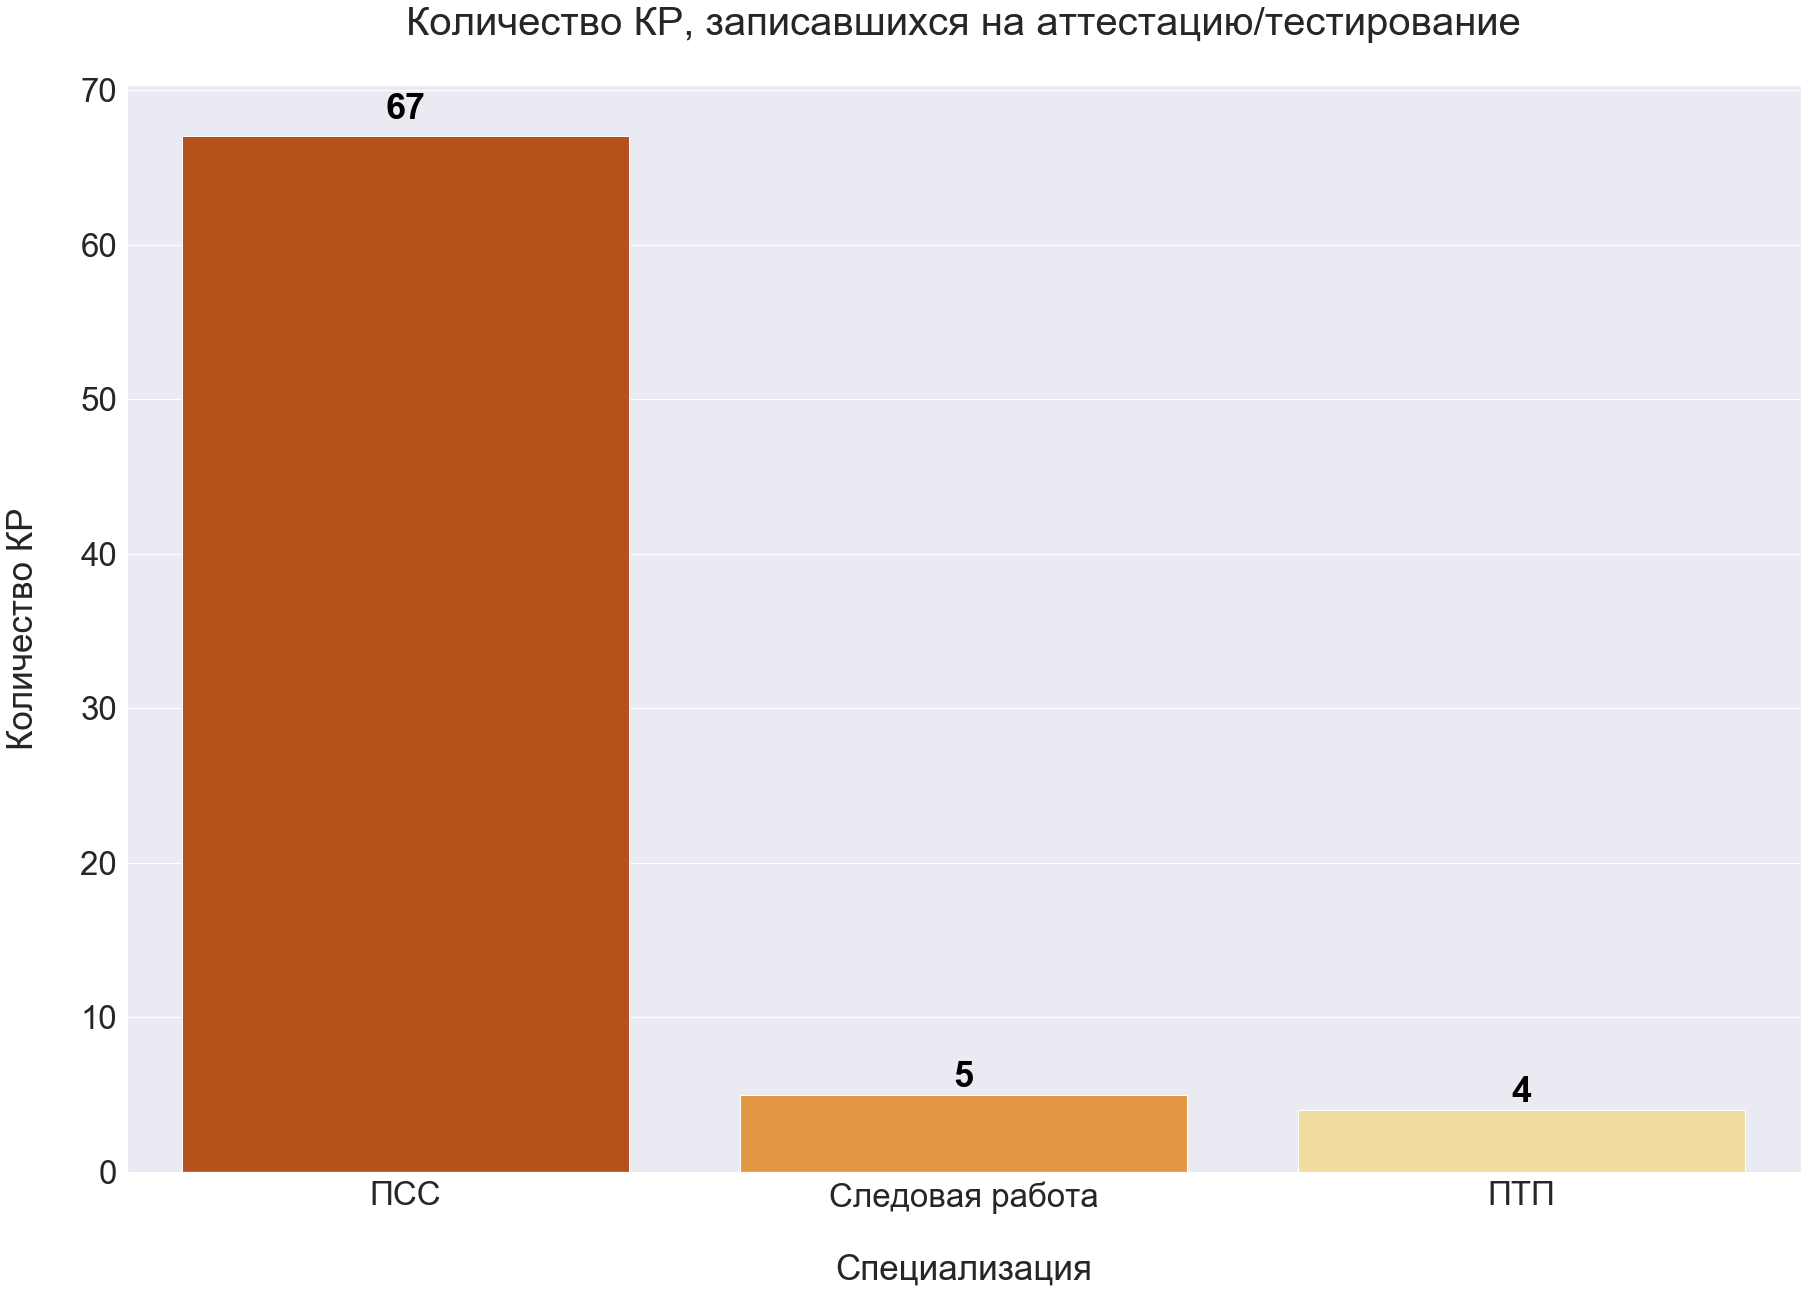

In [10]:
#размер области построения диаграммы
plt.figure(figsize=(30, 20)) 

#увеличиваем размер шрифта надписей на диаграмме
sns.set(font_scale = 3)  

#построение диаграммы
bars = sns.barplot(x ='Специализация', y = 'Количество КР', palette = 'YlOrBr_r', data = df_att_spec_msc_) 

ax = plt.gca()

#аннотирование столбцов диаграммы
autolabel(ax.patches, df_att_spec_msc_['Количество КР'], height_factor=1.01) 

#название диаграммы
bars.axes.set_title('Количество КР, записавшихся на аттестацию/тестирование', fontsize=40, y = 1.04) 

bars.set_xlabel('Специализация', fontsize=35, labelpad = 40) #название оси Х

bars.set_ylabel('Количество КР', fontsize=35, labelpad = 40) #название оси Y

plt.xticks(rotation=0) #поворот значений по оси Х

plt.show() #показываем диаграмму 

## <a id="title2">2. Статистика аттестационных мероприятий ПСС</a>

In [11]:
#Рассмотри только специализацию ПСС

df_spec_PSS_msc = df_msc.query("Специализация == 'ПСС'").copy()

df_spec_PSS_msc.head()

,Дата,Регион,Проводник,Собака,Специализация,Этап,Результат,Баллы
36,14.05.2023,Москва и МО,Тихонова Юлия,Даня,ПСС,ПСС: Послушание,Зачет,28.5
37,14.05.2023,Москва и МО,Тихонова Юлия,Даня,ПСС,ПСС: Поиск и обозначение,Зачет,23.0
38,14.05.2023,Москва и МО,Ковалев Юрий,Рич,ПСС,ПСС: Послушание,Незачет,17.5
39,14.05.2023,Москва и МО,Ковалев Юрий,Рич,ПСС,ПСС: Поиск и обозначение,Незачет,0.0
40,14.05.2023,Москва и МО,Слизовский Евгений,Питер,ПСС,ПСС: Послушание,Зачет,24.0


#### Количество уникальных дней, в которые проводились аттестационные мероприятия по специализации ПСС

In [12]:
df_event_PSS_msc = df_spec_PSS_msc.copy()


df_event_PSS_msc.head()

,Дата,Регион,Проводник,Собака,Специализация,Этап,Результат,Баллы
36,14.05.2023,Москва и МО,Тихонова Юлия,Даня,ПСС,ПСС: Послушание,Зачет,28.5
37,14.05.2023,Москва и МО,Тихонова Юлия,Даня,ПСС,ПСС: Поиск и обозначение,Зачет,23.0
38,14.05.2023,Москва и МО,Ковалев Юрий,Рич,ПСС,ПСС: Послушание,Незачет,17.5
39,14.05.2023,Москва и МО,Ковалев Юрий,Рич,ПСС,ПСС: Поиск и обозначение,Незачет,0.0
40,14.05.2023,Москва и МО,Слизовский Евгений,Питер,ПСС,ПСС: Послушание,Зачет,24.0


In [13]:
df_event_PSS_msc_count_ = df_spec_PSS_msc.groupby(['Дата', 'Этап']).agg({'Этап':'count'}).rename(columns = {'Этап':'Количество'})

df_event_PSS_msc_count_

Количество
Дата       Этап                                
02.06.2023 ПСС: Поиск и обозначение           4
           ПСС: Послушание                    4
03.09.2023 ПСС: Поиск А                       1
05.07.2023 ПСС: Поиск А                       1
05.08.2023 ПСС: Поиск А                       1
08.07.2023 ПСС: Поиск А                       1
09.07.2023 ПСС: Поиск А                       1
           ПСС: Поиск и обозначение           5
           ПСС: Послушание                    7
10.09.2023 ПСС: Поиск А                       2
           ПСС: Поиск и обозначение           6
           ПСС: Послушание                    6
11.06.2023 ПСС: Поиск А                       1
12.06.2023 ПСС: Поиск А                       1
13.08.2023 ПСС: Поиск А                       1
14.05.2023 ПСС: Поиск и обозначение           8
           ПСС: Послушание                    8
15.05.2023 ПСС: Поиск А                       1
16.06.2023 ПСС: Поиск А                       1
18.06.2023 ПСС: Поиск А                       1
20.05.2023 ПСС: Поиск и обозначение          15
           ПСС: Послушание                   15
20.06.2023 ПСС: Поиск А                       2
20.08.2023 ПСС: Поиск А                       2
           ПСС: Поиск и обозначение           7
           ПСС: Послушание                    8
21.05.2023 ПСС: Поиск А                       3
           ПСС: Поиск и обозначение           5
           ПСС: Послушание                    5
22.07.2023 ПСС: Поиск А                       2
           ПСС: Поиск и обозначение           3
           ПСС: Послушание                    4
22.08.2023 ПСС: Поиск А                       1
24.06.2023 ПСС: Поиск А                       1
24.09.2023 ПСС: Поиск А                       3
26.08.2023 ПСС: Поиск А                       2
28.05.2023 ПСС: Поиск и обозначение           7
           ПСС: Послушание                    7
29.07.2023 ПСС: Поиск А                       3

In [14]:
#Сводная таблица

df_event_PSS_msc_count_piv = df_event_PSS_msc_count_.pivot_table(index = ['Дата'],
                     columns = 'Этап',
                     values = 'Количество',
                     aggfunc = 'sum',
                     fill_value = 0).sort_values(['Дата'], ascending=True).reset_index().copy()

df_event_PSS_msc_count_piv

Этап,Дата,ПСС: Поиск А,ПСС: Поиск и обозначение,ПСС: Послушание
0,02.06.2023,0,4,4
1,03.09.2023,1,0,0
2,05.07.2023,1,0,0
3,05.08.2023,1,0,0
4,08.07.2023,1,0,0
5,09.07.2023,1,5,7
6,10.09.2023,2,6,6
7,11.06.2023,1,0,0
8,12.06.2023,1,0,0
9,13.08.2023,1,0,0


*На заметку:* "Поиск и обозначение" и "Послушание" - две части одно этапа "Тестирование". Они разделены, тк часть "Послушание" можно пересдать отдельно от части "Поиск и обозначение" в случае незачета. Поэтому дальше можно будет заметить, что цифры по части "Послушание" больше, чем для "Поиска и обозначения".

In [15]:
df_event_PSS_msc_count = df_spec_PSS_msc.groupby('Этап').agg({'Дата':'nunique'}).rename(columns = {'Дата':'Количество'})

df_event_PSS_msc_count = df_event_PSS_msc_count.drop(['ПСС: Послушание'], axis = 0)\
.rename({'ПСС: Поиск и обозначение':'ПСС: Тестирование'}).reset_index()

df_event_PSS_msc_count

,Этап,Количество
0,ПСС: Поиск А,21
1,ПСС: Тестирование,9


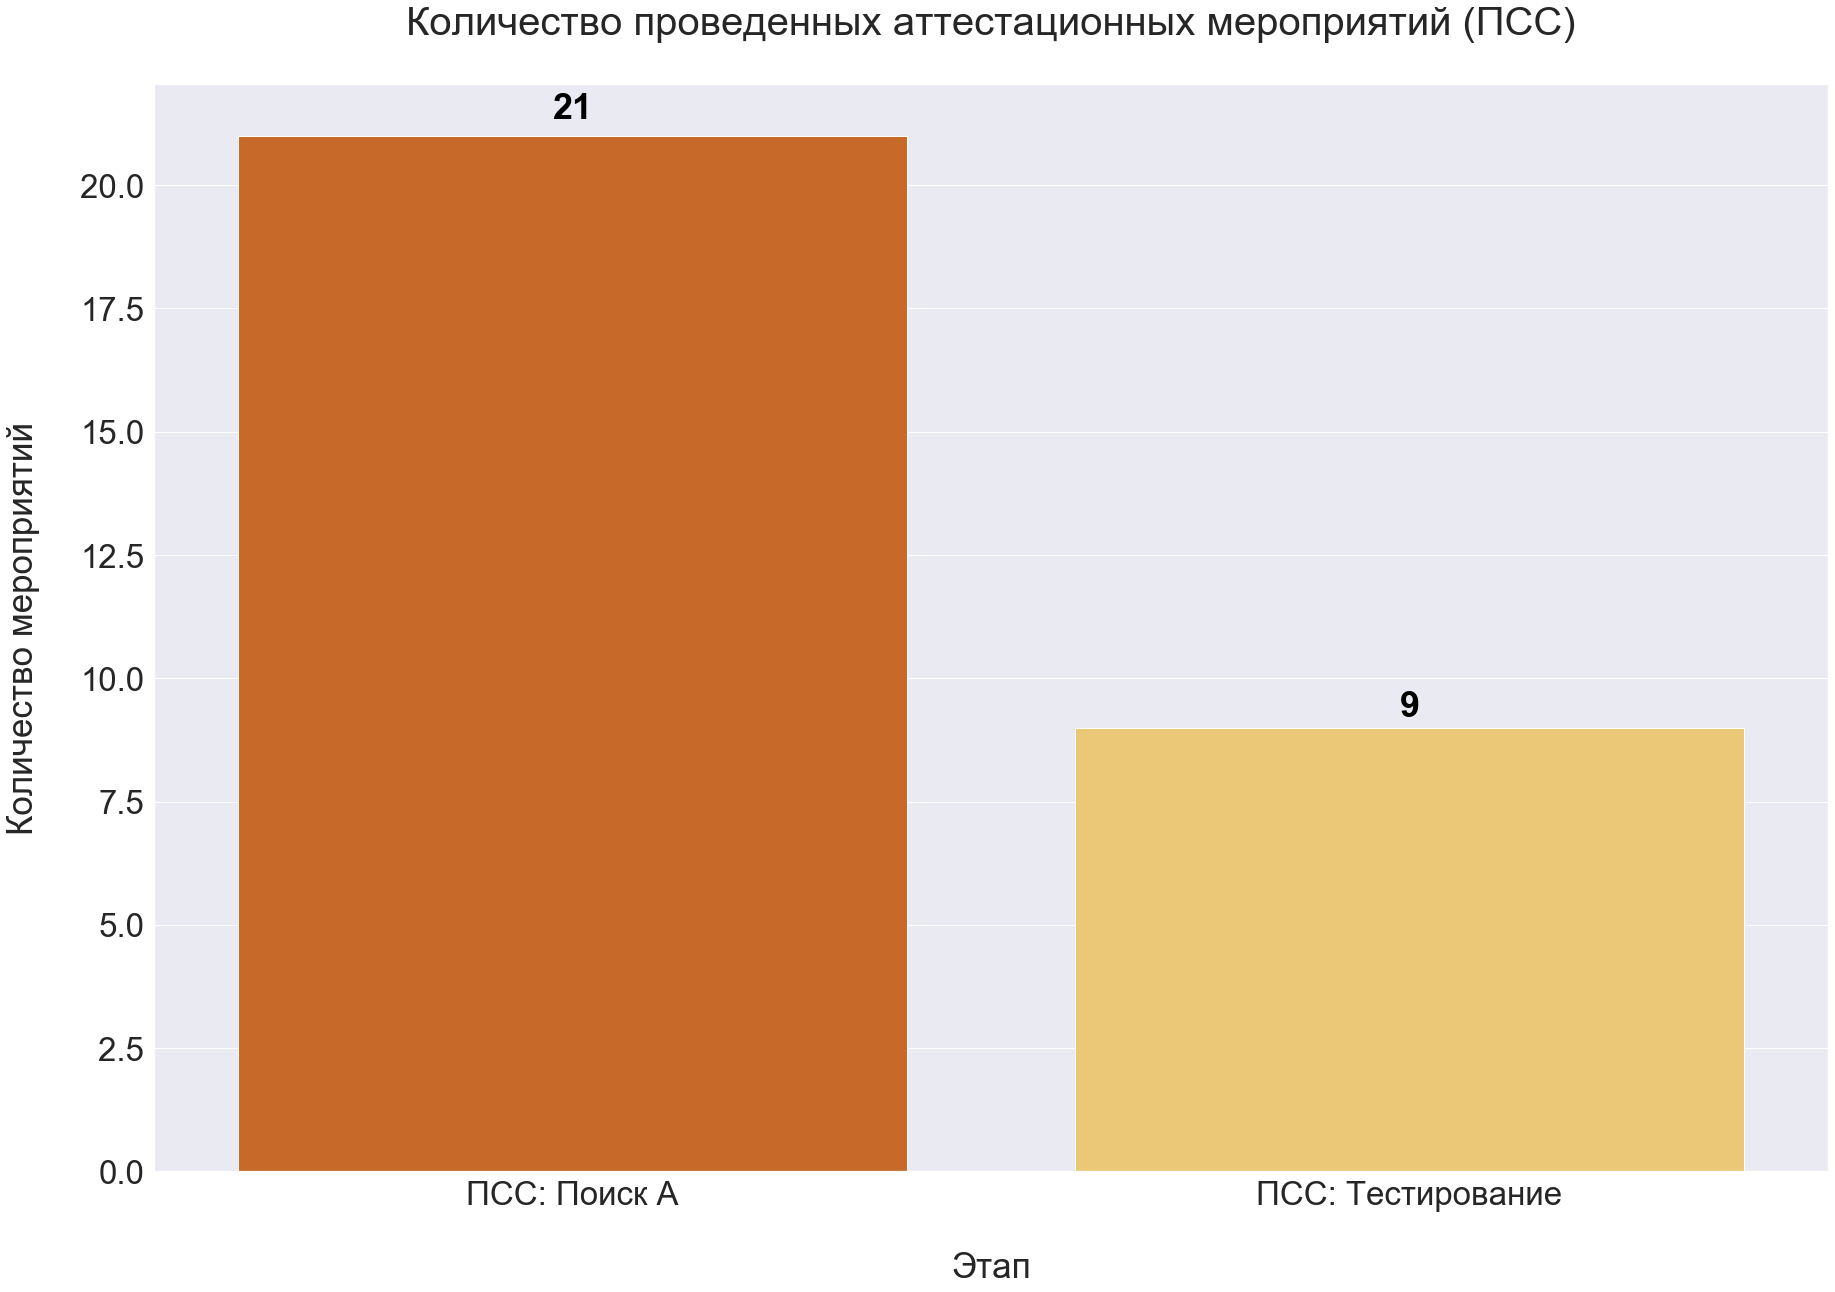

In [16]:
#размер области построения диаграммы
plt.figure(figsize=(30, 20)) 

#увеличиваем размер шрифта надписей на диаграмме
sns.set(font_scale = 3)  

#построение диаграммы
bars = sns.barplot(x ='Этап', y = 'Количество', palette = 'YlOrBr_r', data = df_event_PSS_msc_count) 

ax = plt.gca()

#аннотирование столбцов диаграммы
autolabel(ax.patches, df_event_PSS_msc_count['Количество'], height_factor=1.01) 

#название диаграммы
bars.axes.set_title('Количество проведенных аттестационных мероприятий (ПСС)', fontsize=40, y = 1.04) 

bars.set_xlabel('Этап', fontsize=35, labelpad = 40) #название оси Х

bars.set_ylabel('Количество мероприятий', fontsize=35, labelpad = 40) #название оси Y

plt.xticks(rotation=0) #поворот значений по оси Х

plt.show() #показываем диаграмму 

За сезон по специализации ПСС было проведено 30 аттестационных мероприятий по новым правилам (21 - ПСС А и 9 -тестирование). 

*На заметку:* здесь количество аттестационных мероприятий - это количество уникальных дней, в которые проводились мероприятия. Т.е. в один день могло быть проведено несколько аттестаций по классу А, но это считается как одно мероприятие.


In [17]:
df_event_PSS_msc_search = df_event_PSS_msc.query("Этап == 'ПСС: Поиск и обозначение'").drop_duplicates(subset = ['Проводник', 'Собака'])

df_event_PSS_msc_search.head()

,Дата,Регион,Проводник,Собака,Специализация,Этап,Результат,Баллы
37,14.05.2023,Москва и МО,Тихонова Юлия,Даня,ПСС,ПСС: Поиск и обозначение,Зачет,23.0
39,14.05.2023,Москва и МО,Ковалев Юрий,Рич,ПСС,ПСС: Поиск и обозначение,Незачет,0.0
41,14.05.2023,Москва и МО,Слизовский Евгений,Питер,ПСС,ПСС: Поиск и обозначение,Зачет,23.0
43,14.05.2023,Москва и МО,Иванова Мария,Баки,ПСС,ПСС: Поиск и обозначение,Незачет,0.0
45,14.05.2023,Москва и МО,Иванова Мария,Мурзик,ПСС,ПСС: Поиск и обозначение,Зачет,24.0


In [18]:
df_event_PSS_msc_obid = df_event_PSS_msc.query("Этап == 'ПСС: Послушание'").drop_duplicates(subset = ['Проводник', 'Собака'])

df_event_PSS_msc_obid.head()

,Дата,Регион,Проводник,Собака,Специализация,Этап,Результат,Баллы
36,14.05.2023,Москва и МО,Тихонова Юлия,Даня,ПСС,ПСС: Послушание,Зачет,28.5
38,14.05.2023,Москва и МО,Ковалев Юрий,Рич,ПСС,ПСС: Послушание,Незачет,17.5
40,14.05.2023,Москва и МО,Слизовский Евгений,Питер,ПСС,ПСС: Послушание,Зачет,24.0
42,14.05.2023,Москва и МО,Иванова Мария,Баки,ПСС,ПСС: Послушание,Зачет,27.0
44,14.05.2023,Москва и МО,Иванова Мария,Мурзик,ПСС,ПСС: Послушание,Незачет,15.5


#### Количество кинологов, проходивших различные этапы аттестации ПСС

Один кинолог может проходить аттестацию или тестирование с разными собаками, и, соответственно, это будут разные кинологические расчеты. Поэтому для того, чтобы понять количество КР, проходивших аттестацию/тестирование, посчитаем количество уникальных собак.

*На заметку:* одна и так же собака может проходить аттестацию/тестирование с разными проводниками, но в данном отчетном периоде и ранее такого не наблюдалось. Но если такая ситуация возникнет, то нижеуказанные выкладки будут не совсем корректны.

In [19]:
df_test_PSS_msc = df_event_PSS_msc.groupby(['Этап']).agg({'Собака':'nunique'})\
.rename(columns = {'Собака':'Количество'}).sort_values(['Количество'], ascending = False).reset_index()
df_test_PSS_msc

,Этап,Количество
0,ПСС: Послушание,54
1,ПСС: Поиск и обозначение,53
2,ПСС: Поиск А,27


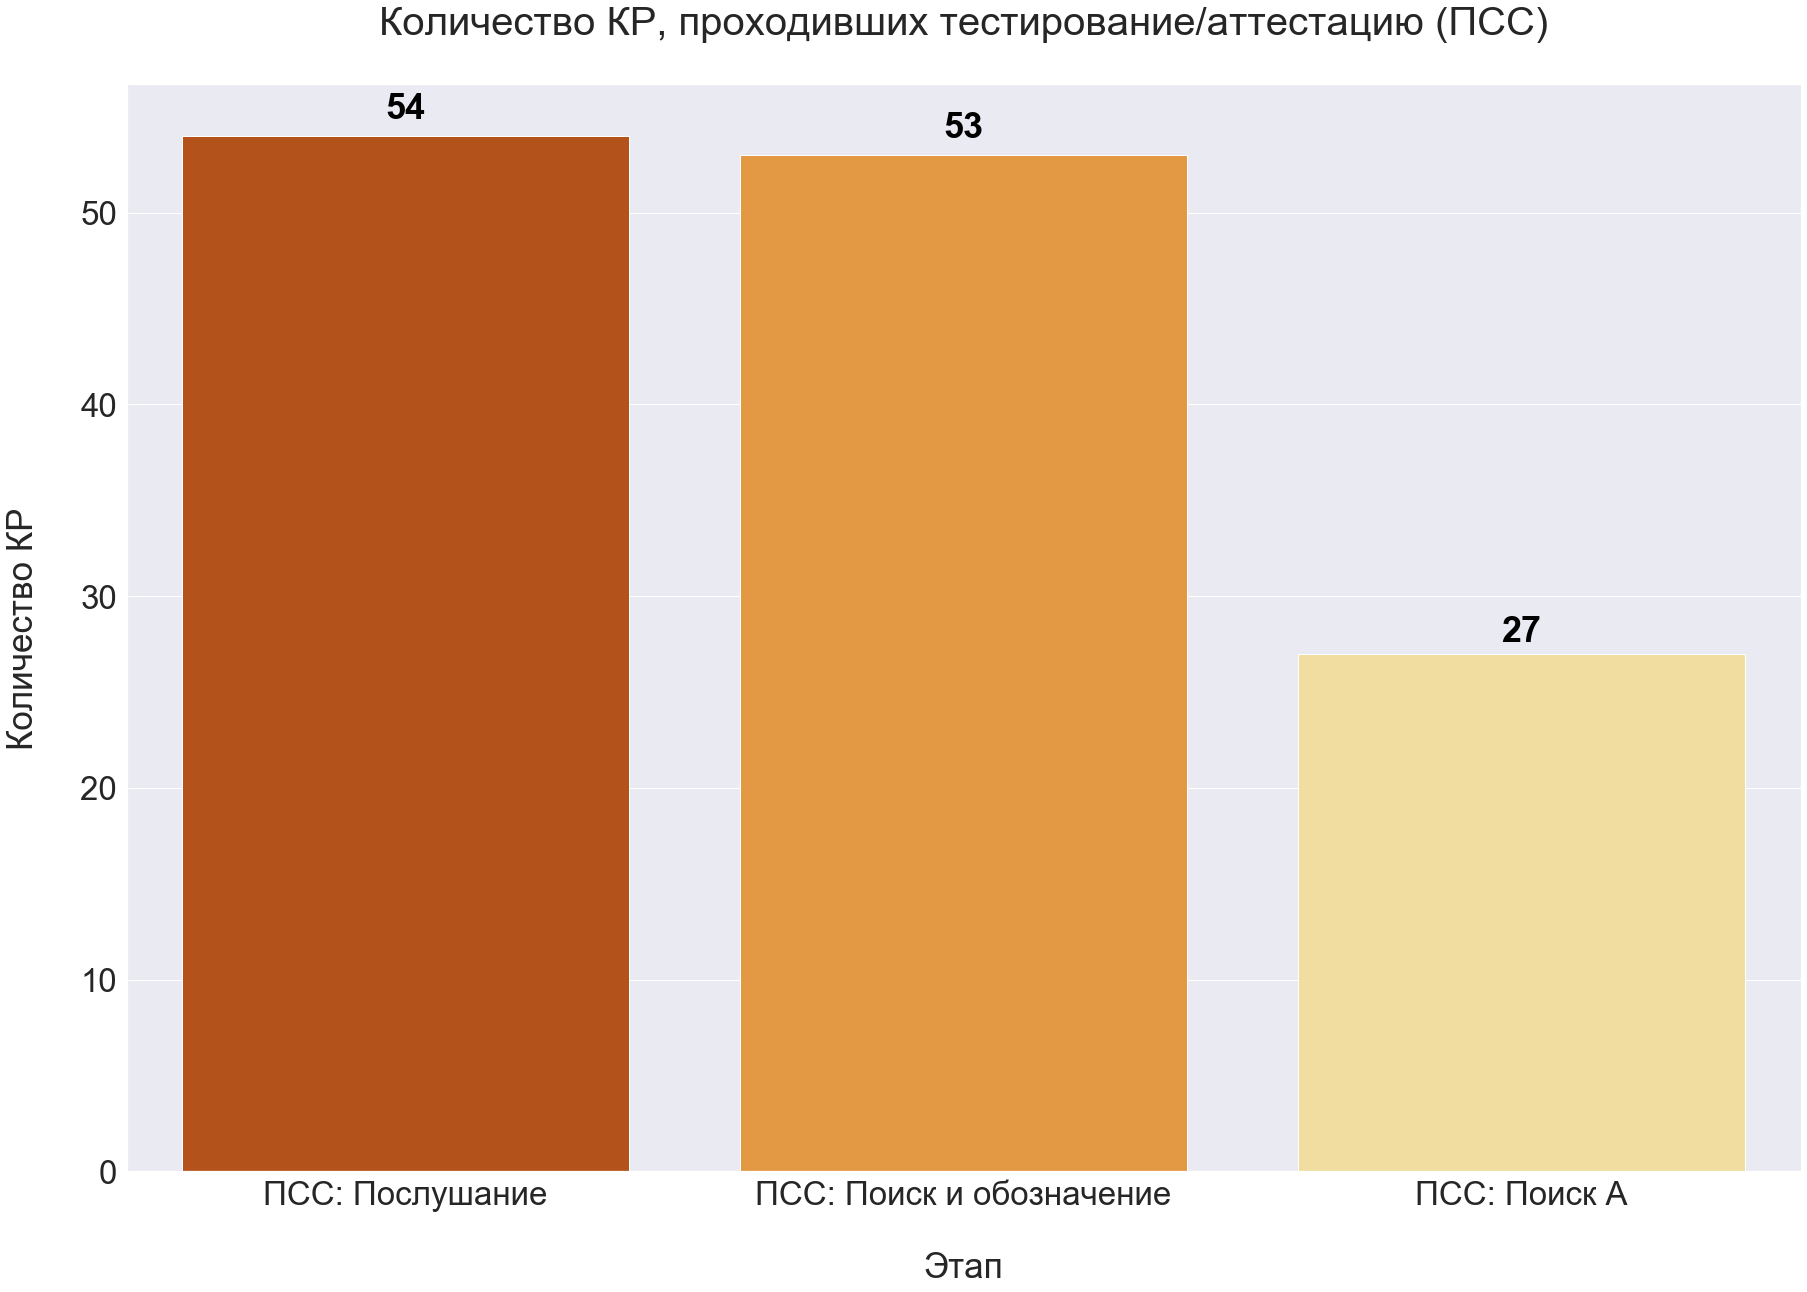

In [20]:
#размер области построения диаграммы
plt.figure(figsize=(30, 20)) 

#увеличиваем размер шрифта надписей на диаграмме
sns.set(font_scale = 3)  

#построение диаграммы
bars = sns.barplot(x ='Этап', y = 'Количество', palette = 'YlOrBr_r', data = df_test_PSS_msc) 

ax = plt.gca()

#аннотирование столбцов диаграммы
autolabel(ax.patches,df_test_PSS_msc['Количество'], height_factor=1.01) 

#название диаграммы
bars.axes.set_title('Количество КР, проходивших тестирование/аттестацию (ПСС)', fontsize=40, y = 1.04) 

bars.set_xlabel('Этап', fontsize=35, labelpad = 40) #название оси Х

bars.set_ylabel('Количество КР', fontsize=35, labelpad = 40) #название оси Y

plt.xticks(rotation=0) #поворот значений по оси Х

plt.show() #показываем диаграмму 

По специализации ПСС за сезон 81 КР принимал участие в различных этапах аттестации по новым правилам. Из них:

•	ПСС А - 27 КР;

•	Тестирование - 54 КР:

    - Послушание - 54 КР (1 дисквал);
    - Поиск и обозначение - 53 КР.


#### Количество попыток прохождения различных этапов аттестации ПСС и результаты

Поскольку по итогам прохождения того или иного этапа аттестации есть возможность получить "незачет", то есть смысл рассмотреть число попыток сдачи. Также посчитаем количество удачных и неудачных попыток.

In [21]:
df_try_PSS_msc = df_event_PSS_msc.groupby(['Этап']).agg({'Проводник':'count'})\
.rename(columns = {'Проводник':'Количество'}).sort_values(['Количество'], ascending = False).reset_index()

df_try_PSS_msc

,Этап,Количество
0,ПСС: Послушание,64
1,ПСС: Поиск и обозначение,60
2,ПСС: Поиск А,32


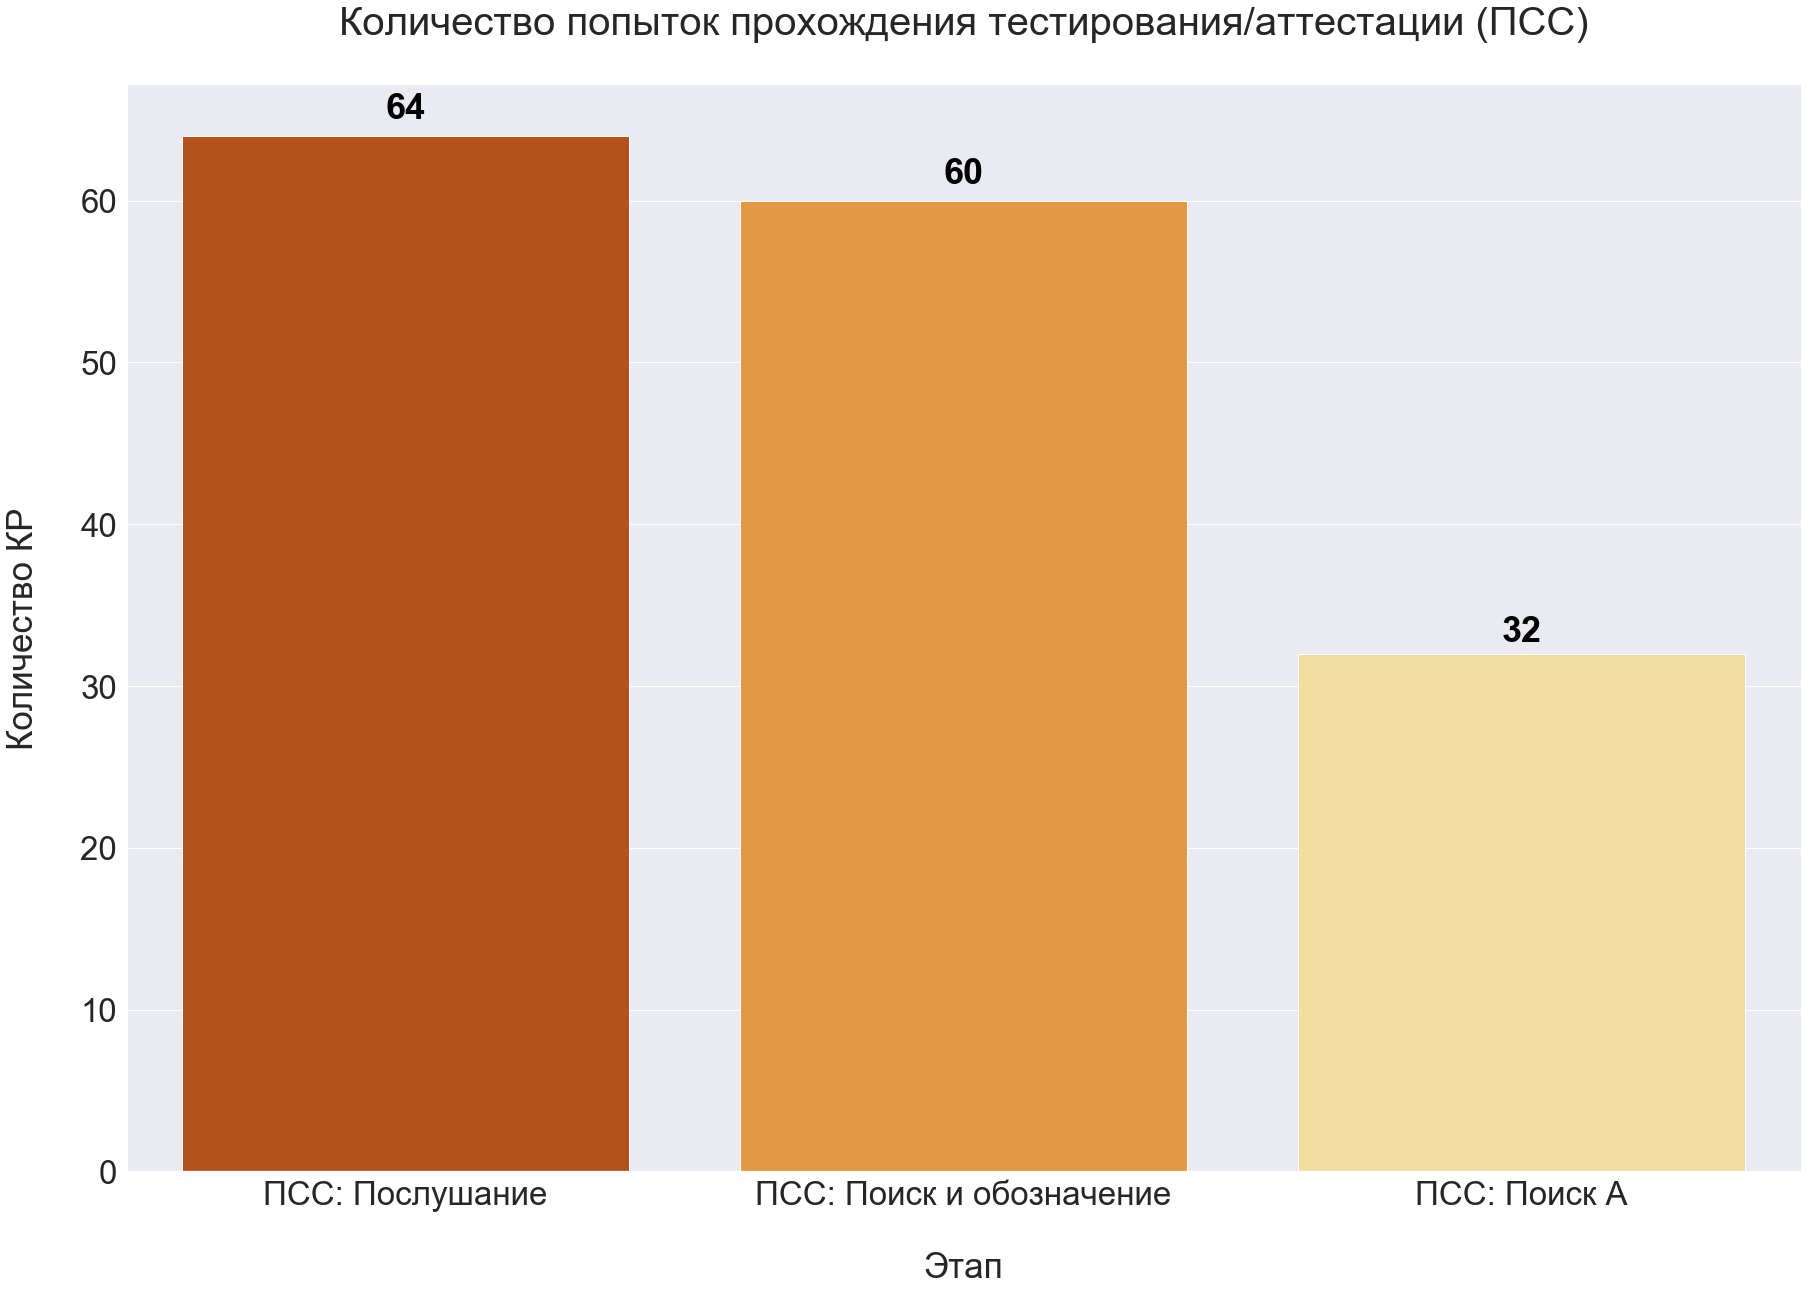

In [22]:
#размер области построения диаграммы
plt.figure(figsize=(30, 20)) 

#увеличиваем размер шрифта надписей на диаграмме
sns.set(font_scale = 3)  

#построение диаграммы
bars = sns.barplot(x ='Этап', y = 'Количество', palette = 'YlOrBr_r', data = df_try_PSS_msc) 

ax = plt.gca()

#аннотирование столбцов диаграммы
autolabel(ax.patches,df_try_PSS_msc['Количество'], height_factor=1.01) 

#название диаграммы
bars.axes.set_title('Количество попыток прохождения тестирования/аттестации (ПСС)', fontsize=40, y = 1.04) 

bars.set_xlabel('Этап', fontsize=35, labelpad = 40) #название оси Х

bars.set_ylabel('Количество КР', fontsize=35, labelpad = 40) #название оси Y

plt.xticks(rotation=0) #поворот значений по оси Х

plt.show() #показываем диаграмму 

In [23]:
#Сводная таблица с результатами по каждой специализации

df_pass_msc = df_msc.groupby(['Этап', 'Результат']).agg({'Результат':'count'}).rename(columns = {'Результат':'Количество'})

df_pass_msc

Количество
Этап                                               Результат               
ПСС: Поиск А                                       Доппроверка            1
                                                   Зачет                 22
                                                   Незачет                7
                                                   Перепроверка           2
ПСС: Поиск и обозначение                           Зачет                 45
                                                   Незачет               15
ПСС: Послушание                                    Дисквал                1
                                                   Зачет                 51
                                                   Незачет               12
ПТП (гнилостные): Базовая проверка поискового н... Зачет                  4
ПТП (гнилостные): Основной поисковой этап          Зачет                  4
ПТП: Послушание                                    Зачет                  4
ПТП: Проверка знаний проводника                    Зачет                  4
След: А                                            Зачет                  2
След: Первичное                                    Зачет                  3
                                                   Незачет                1

In [24]:
#Рассмотрим только ПСС

df_pass_msc_PSS = df_pass_msc.filter(like = 'ПСС', axis = 0)

df_pass_msc_PSS

Количество
Этап                     Результат               
ПСС: Поиск А             Доппроверка            1
                         Зачет                 22
                         Незачет                7
                         Перепроверка           2
ПСС: Поиск и обозначение Зачет                 45
                         Незачет               15
ПСС: Послушание          Дисквал                1
                         Зачет                 51
                         Незачет               12

In [25]:
df_pass_msc_PSS_count = df_pass_msc_PSS.pivot_table(index = ['Результат'],
                     columns = 'Этап',
                     values = 'Количество',
                     aggfunc = 'sum',
                     fill_value = 0).reset_index().copy()

ddf_pass_msc_PSS_count  = df_pass_msc_PSS_count.set_index('Результат')\
  .reindex(df_pass_msc_PSS_count.set_index('Результат').sum().sort_values(ascending=False).index, axis=1)

ddf_pass_msc_PSS_count = ddf_pass_msc_PSS_count.sort_values(['ПСС: Поиск и обозначение'],ascending=False)

ddf_pass_msc_PSS_count

Этап,ПСС: Послушание,ПСС: Поиск и обозначение,ПСС: Поиск А
Результат,,,
Зачет,51,45,22
Незачет,12,15,7
Дисквал,1,0,0
Доппроверка,0,0,1
Перепроверка,0,0,2


In [26]:
df_pass_msc_PSS_perc = ddf_pass_msc_PSS_count.copy()

In [27]:
#Сводная таблица с процентами оценок по каждому этапу аттестации

df_pass_msc_PSS_perc['Послушание процент'] = round(df_pass_msc_PSS_perc['ПСС: Послушание']*100/df_pass_msc_PSS_perc['ПСС: Послушание'].sum()).astype(int)

df_pass_msc_PSS_perc['Поиск процент'] = round(df_pass_msc_PSS_perc['ПСС: Поиск и обозначение']*100/df_pass_msc_PSS_perc['ПСС: Поиск и обозначение'].sum()).astype(int)

df_pass_msc_PSS_perc['ПСС А процент'] = round(df_pass_msc_PSS_perc['ПСС: Поиск А']*100/df_pass_msc_PSS_perc['ПСС: Поиск А'].sum()).astype(int)



df_pass_msc_PSS_perc 

Этап,ПСС: Послушание,ПСС: Поиск и обозначение,ПСС: Поиск А,Послушание процент,Поиск процент,ПСС А процент
Результат,,,,,,
Зачет,51,45,22,80,75,69
Незачет,12,15,7,19,25,22
Дисквал,1,0,0,2,0,0
Доппроверка,0,0,1,0,0,3
Перепроверка,0,0,2,0,0,6


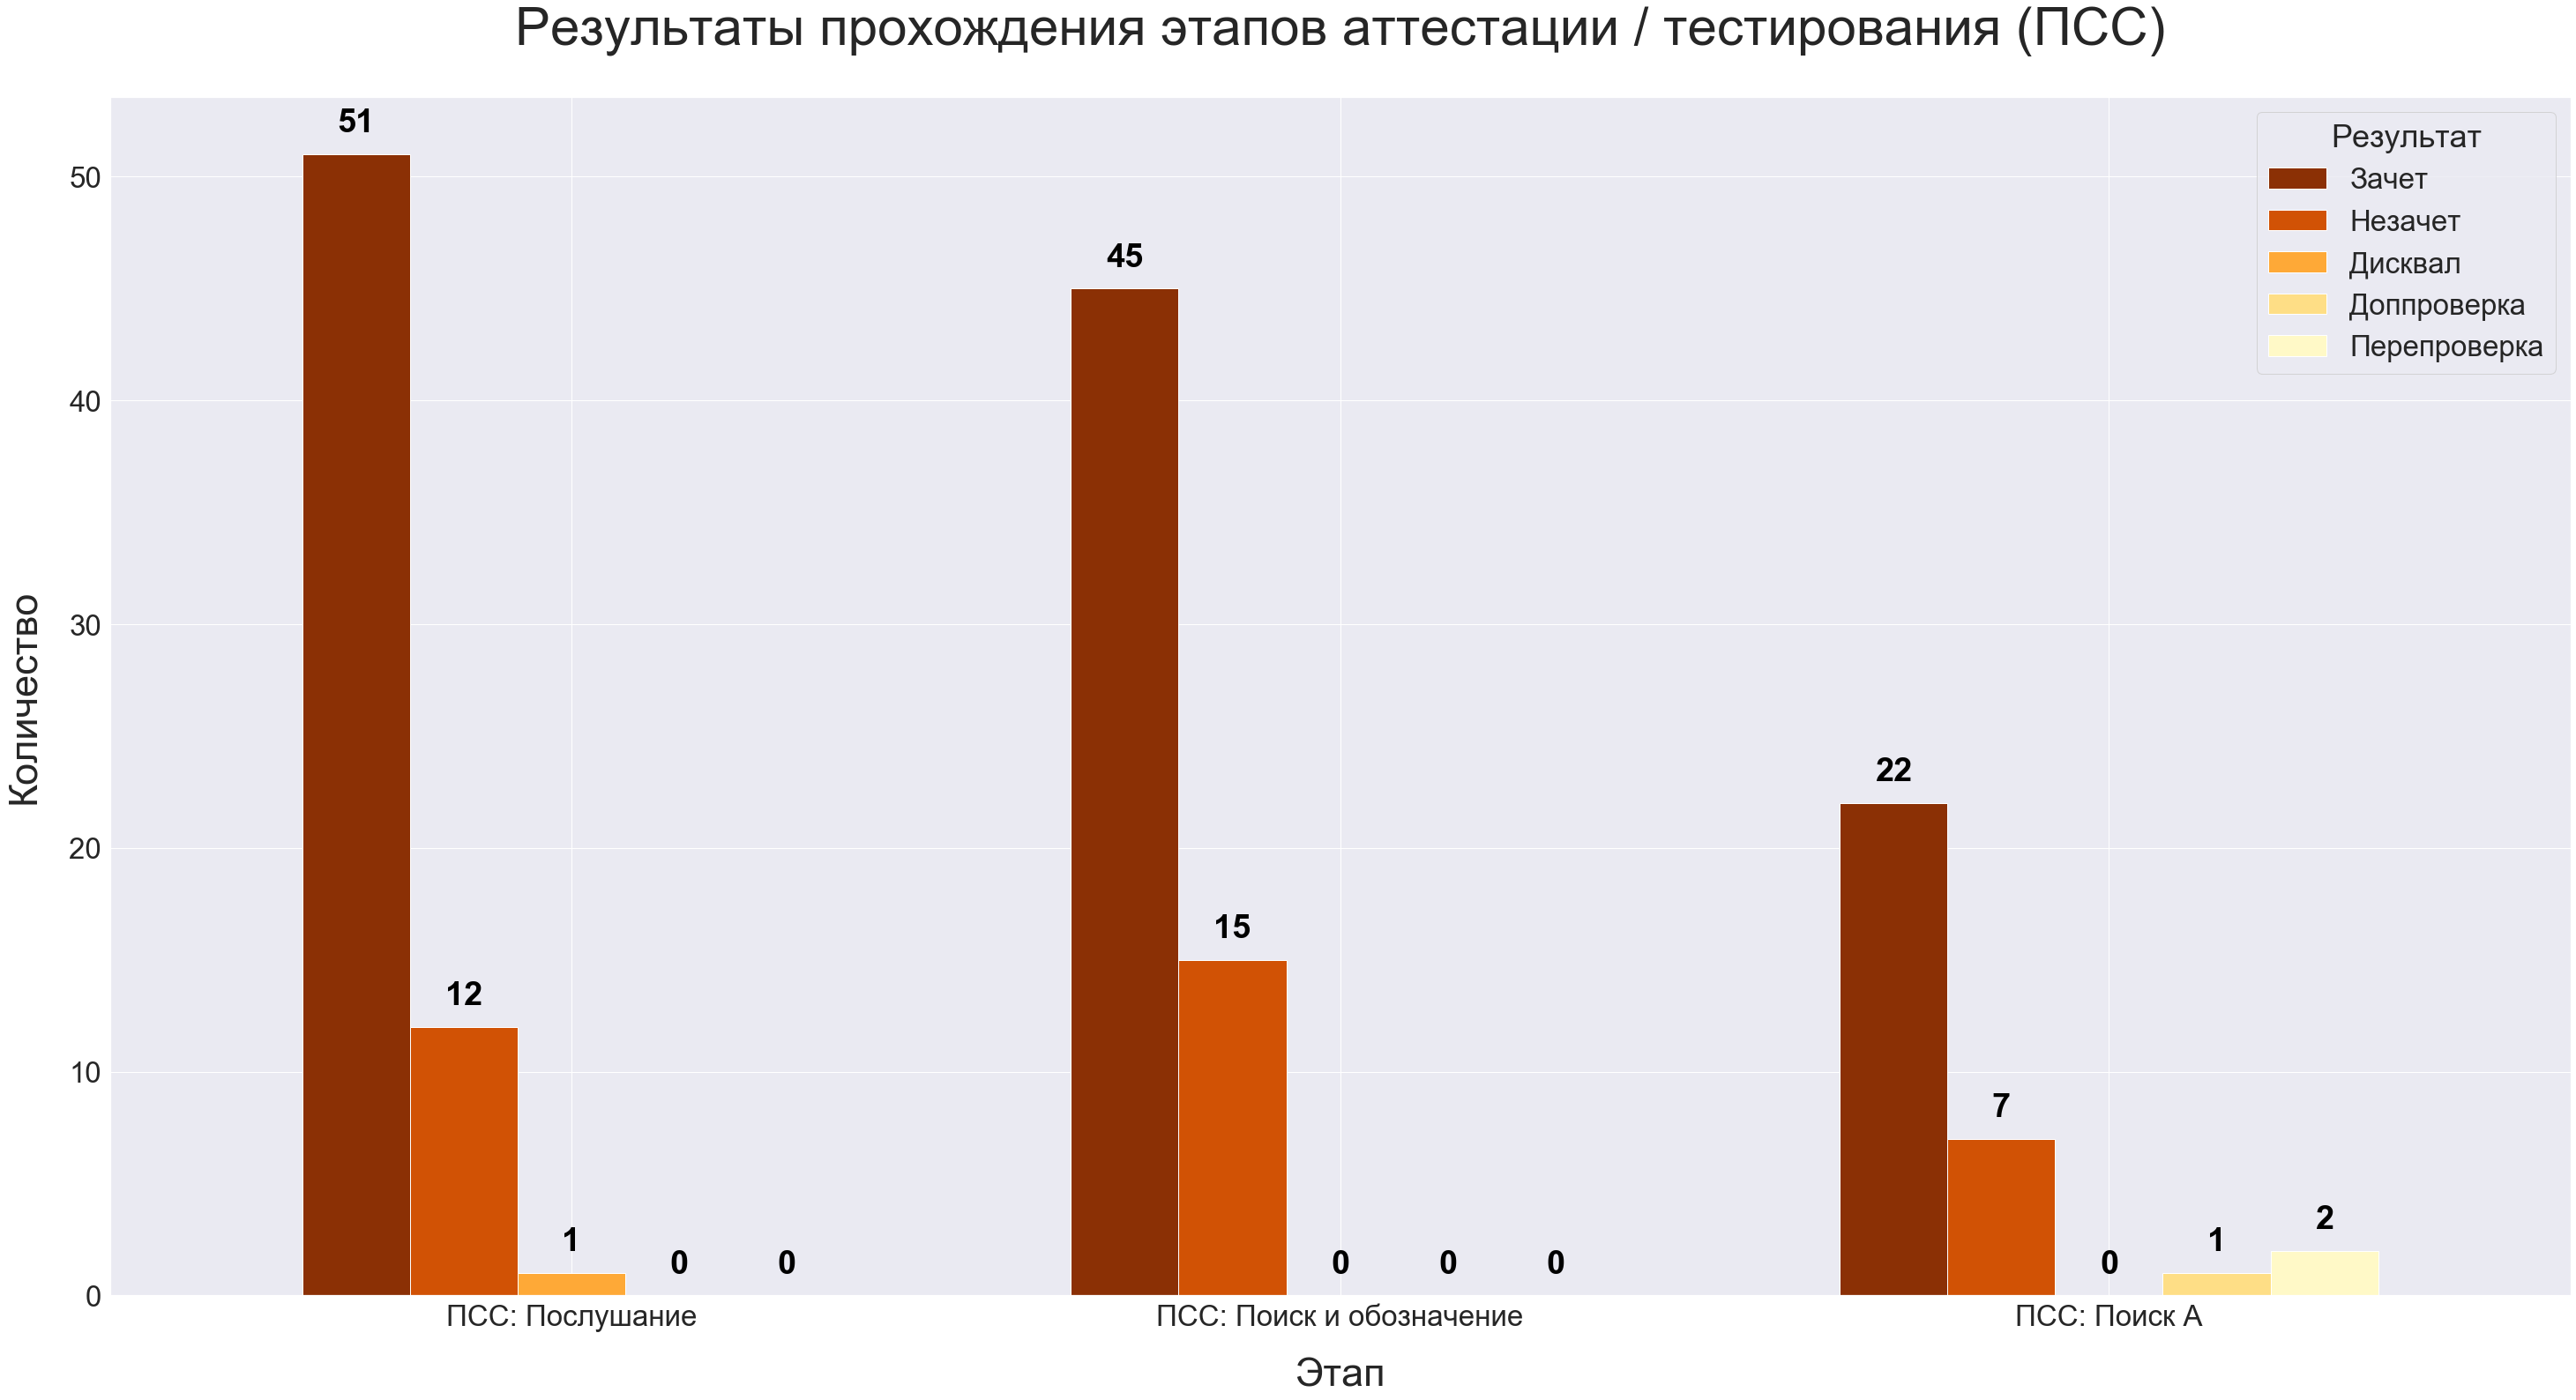

In [28]:
sns.set(font_scale = 3)

bars = ddf_pass_msc_PSS_count.T.plot(kind='bar', width = 0.7, stacked=False,
          colormap=ListedColormap(sns.color_palette("YlOrBr_r", 10)), 
          figsize=(50,25))



# Add labels to each bar.
for bar in bars.patches:
    bars.text(
      # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y() + 1,
      # This is actual value we'll show.
      round(bar.get_height()),
      # Center the labels and style them a bit.
      ha='center',
      color='black',
      weight='bold',
      size=38
  )
    

    
bars.axes.set_title('Результаты прохождения этапов аттестации / тестирования (ПСС)', fontsize=60, y = 1.04) 

bars.set_xlabel('Этап', fontsize=45, labelpad = 30) #название оси Х

bars.set_ylabel('Количество', fontsize=45, labelpad = 30) #название оси Y

plt.xticks(rotation=0) #поворот значений по оси Х

plt.show() #показываем диаграмму 


Всего было 96 попыток сдачи различных этапов аттестации. Из них:

•	ПСС А - 32 попытки:
    - Зачет - 22 попытки (69 %);
    - Незачет - 7 попыток (22 %);
    - Доппроверка - 1 попытка (3 %);
    - Перепроверка - 2 попыток (6 %).
    
•	Тестирование (послушание) - 64 попытки:
    - Зачет - 51 попытка (80 %);
    - Незачет - 12 попыток (19 %);
    - Дисквал - 1 попытка (2 %).
    
•	Тестирование (поиск и обозначение) - 60 попыток:
    - Зачет - 45 попыток (75 %);
    - Незачет - 15 попыток (25 %).



## <a id="title3">3. Результаты прохождения аттестационных мероприятий След</a>

In [29]:
df_pass_msc_sled = df_pass_msc.filter(like = 'След', axis = 0)

df_pass_msc_sled

Количество
Этап            Результат            
След: А         Зачет               2
След: Первичное Зачет               3
                Незачет             1

In [30]:
df_pass_msc_sled_ = df_pass_msc_sled.pivot_table(index = ['Результат'],
                     columns = 'Этап',
                     values = 'Количество',
                     aggfunc = 'sum',
                     fill_value = 0).reset_index().copy()

ddf_pass_msc_sled_  = df_pass_msc_sled_.set_index('Результат')\
  .reindex(df_pass_msc_sled_.set_index('Результат').sum().sort_values(ascending=False).index, axis=1)


ddf_pass_msc_sled_

Этап,След: Первичное,След: А
Результат,,
Зачет,3,2
Незачет,1,0


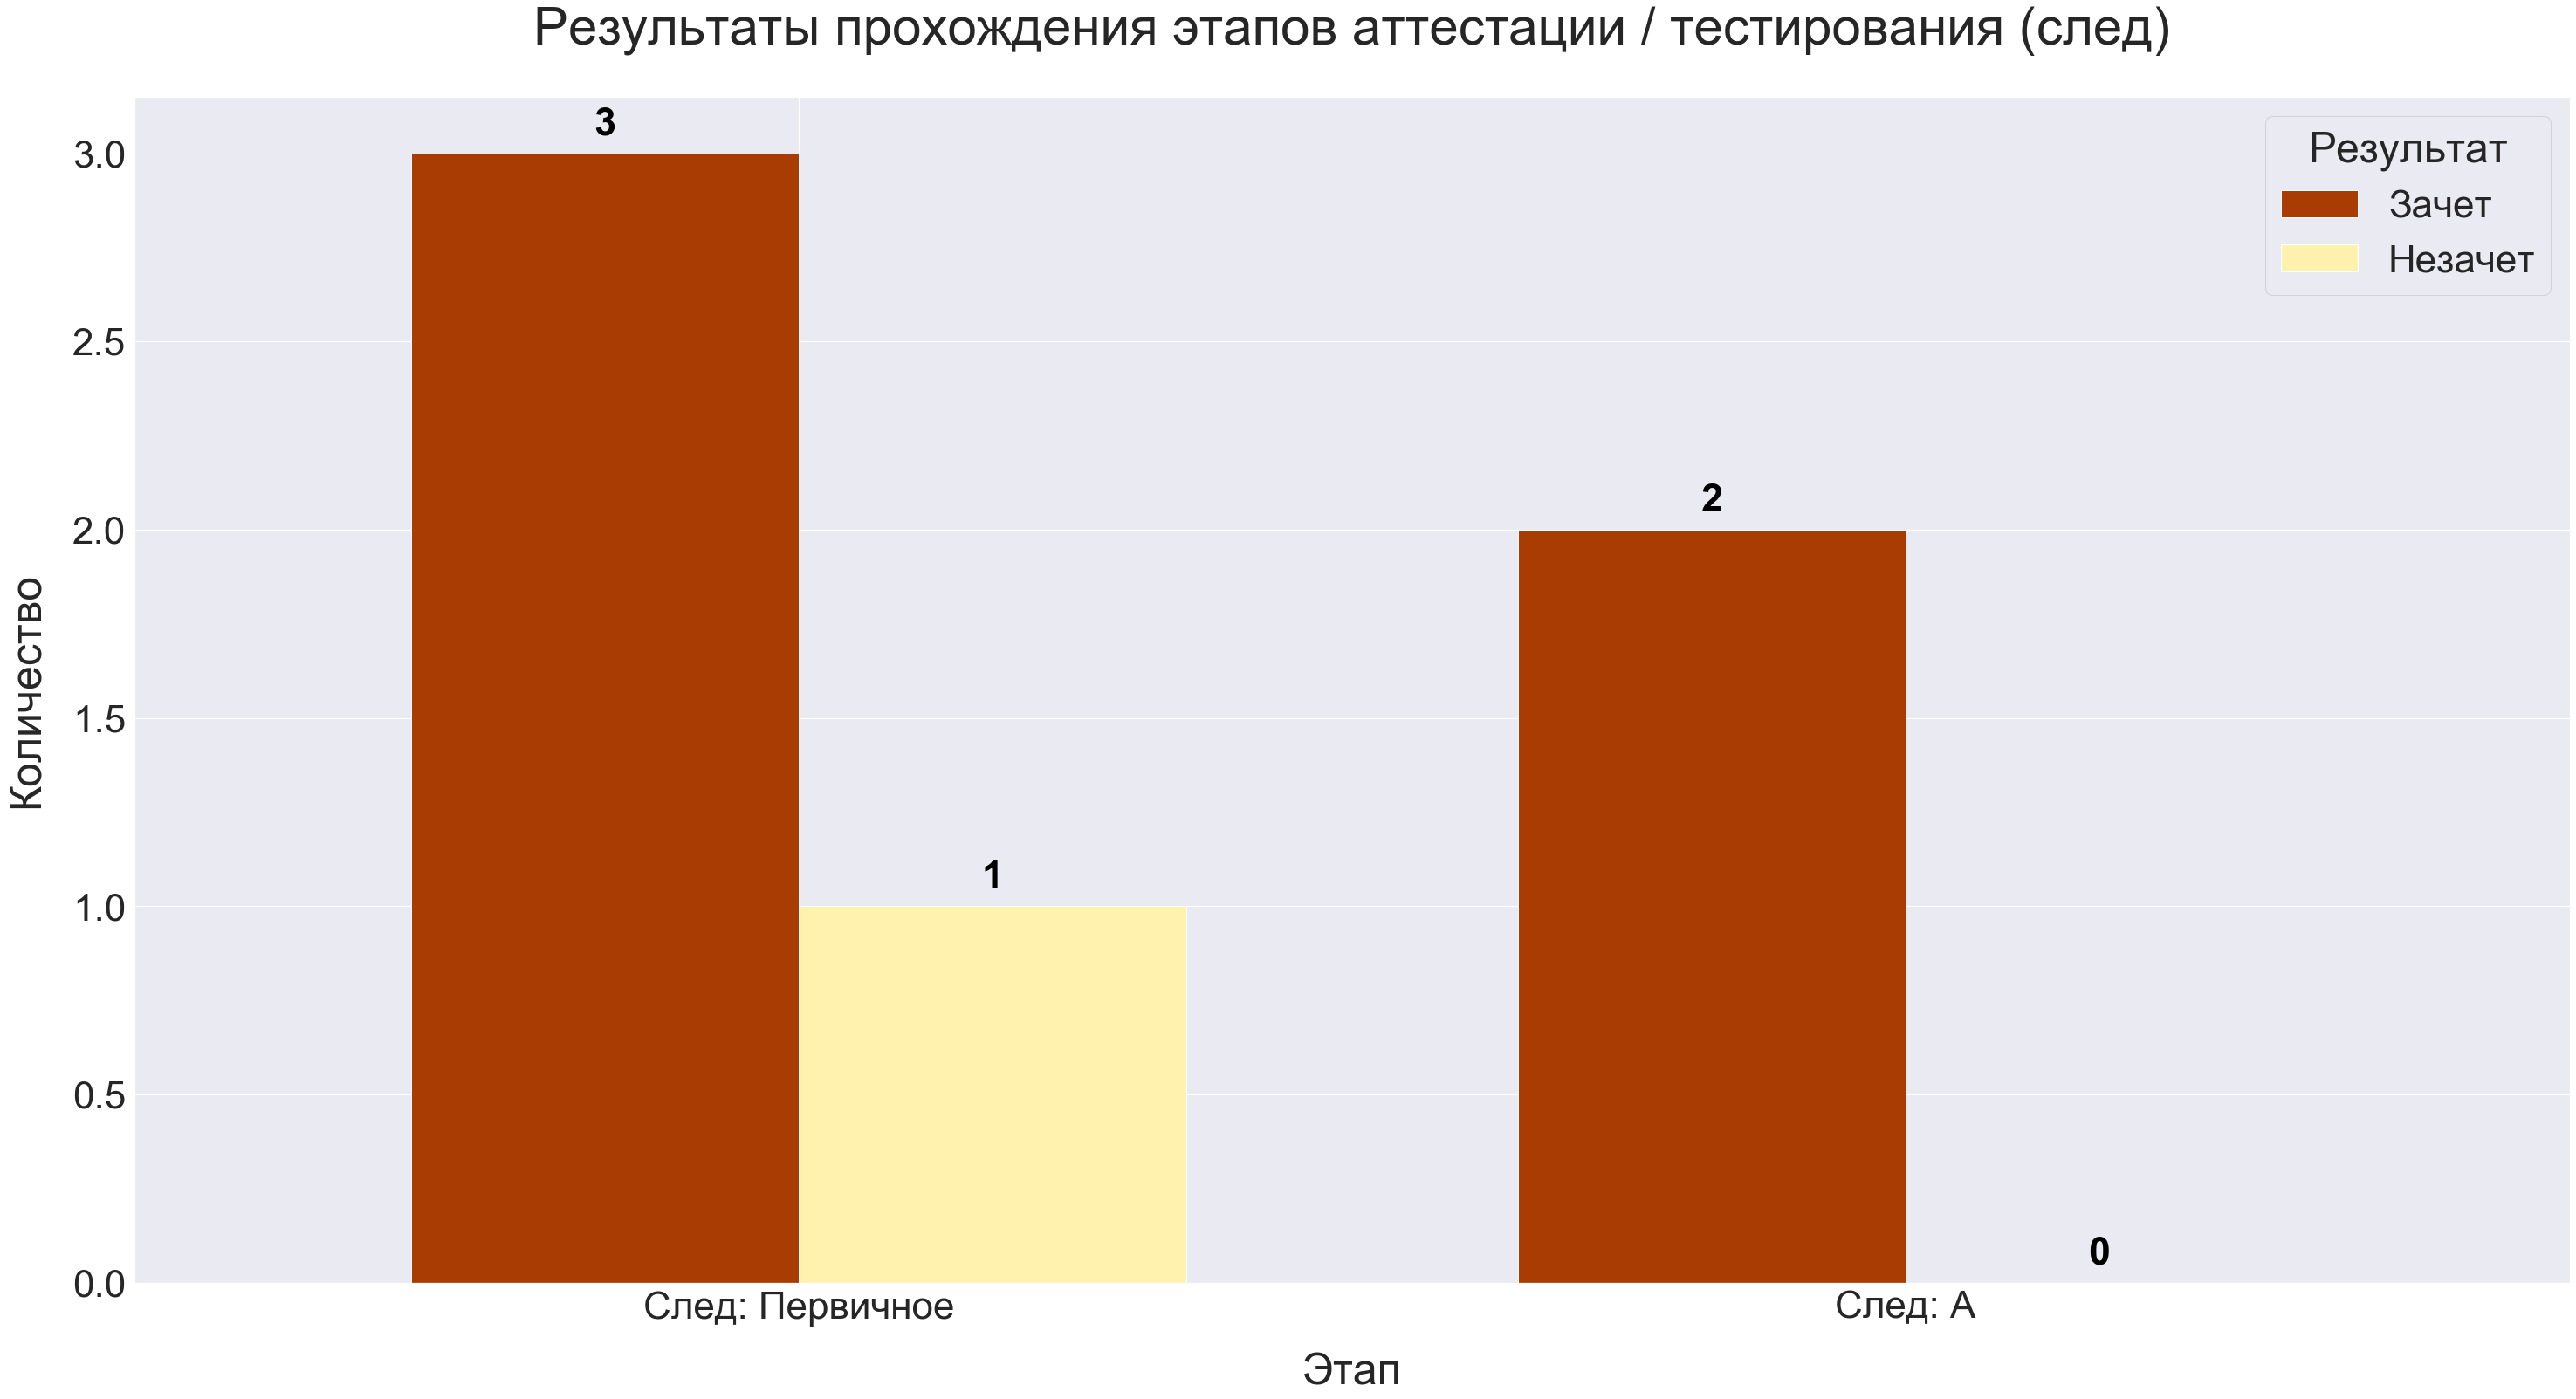

In [31]:
sns.set(font_scale = 4)

bars = ddf_pass_msc_sled_.T.plot(kind='bar', width = 0.7, stacked=False,
          colormap=ListedColormap(sns.color_palette("YlOrBr_r", 5)), 
          figsize=(50,25))


# Add labels to each bar.
for bar in bars.patches:
    bars.text(
      # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y() + 0.05,
      # This is actual value we'll show.
      round(bar.get_height()),
      # Center the labels and style them a bit.
      ha='center',
      color='black',
      weight='bold',
      size=45
  )
bars.axes.set_title('Результаты прохождения этапов аттестации / тестирования (след)', fontsize=60, y = 1.04) 

bars.set_xlabel('Этап', fontsize=50, labelpad = 30) #название оси Х

bars.set_ylabel('Количество', fontsize=50, labelpad = 30) #название оси Y

plt.xticks(rotation=0) #поворот значений по оси Х

plt.show() #показываем диаграмму 

По следовому направлению в 2023 г. в Московском регионе различные этапы аттестации проходили 6 КР. Из них:

•	След: Первичное - 4 КР:
    - Зачет - 3 КР;
    - Незачет - 1 КР.

•	След: А - 1 КР (зачет).


## <a id="title4">4. Результаты прохождения аттестационных мероприятий ПТП</a>

In [32]:
df_pass_PTP_msc = df_pass_msc.filter(like = 'ПТП', axis = 0).sort_values(['Количество'], ascending = False).reset_index()

df_pass_PTP_msc

,Этап,Результат,Количество
0,ПТП (гнилостные): Базовая проверка поискового ...,Зачет,4
1,ПТП (гнилостные): Основной поисковой этап,Зачет,4
2,ПТП: Послушание,Зачет,4
3,ПТП: Проверка знаний проводника,Зачет,4


In [33]:

df_pass_PTP_msc['Этап'] = ["\n".join(textwrap.wrap(i,30)) for i in df_pass_PTP_msc['Этап']]

df_pass_PTP_msc

,Этап,Результат,Количество
0,ПТП (гнилостные): Базовая\nпроверка поискового...,Зачет,4
1,ПТП (гнилостные): Основной\nпоисковой этап,Зачет,4
2,ПТП: Послушание,Зачет,4
3,ПТП: Проверка знаний\nпроводника,Зачет,4


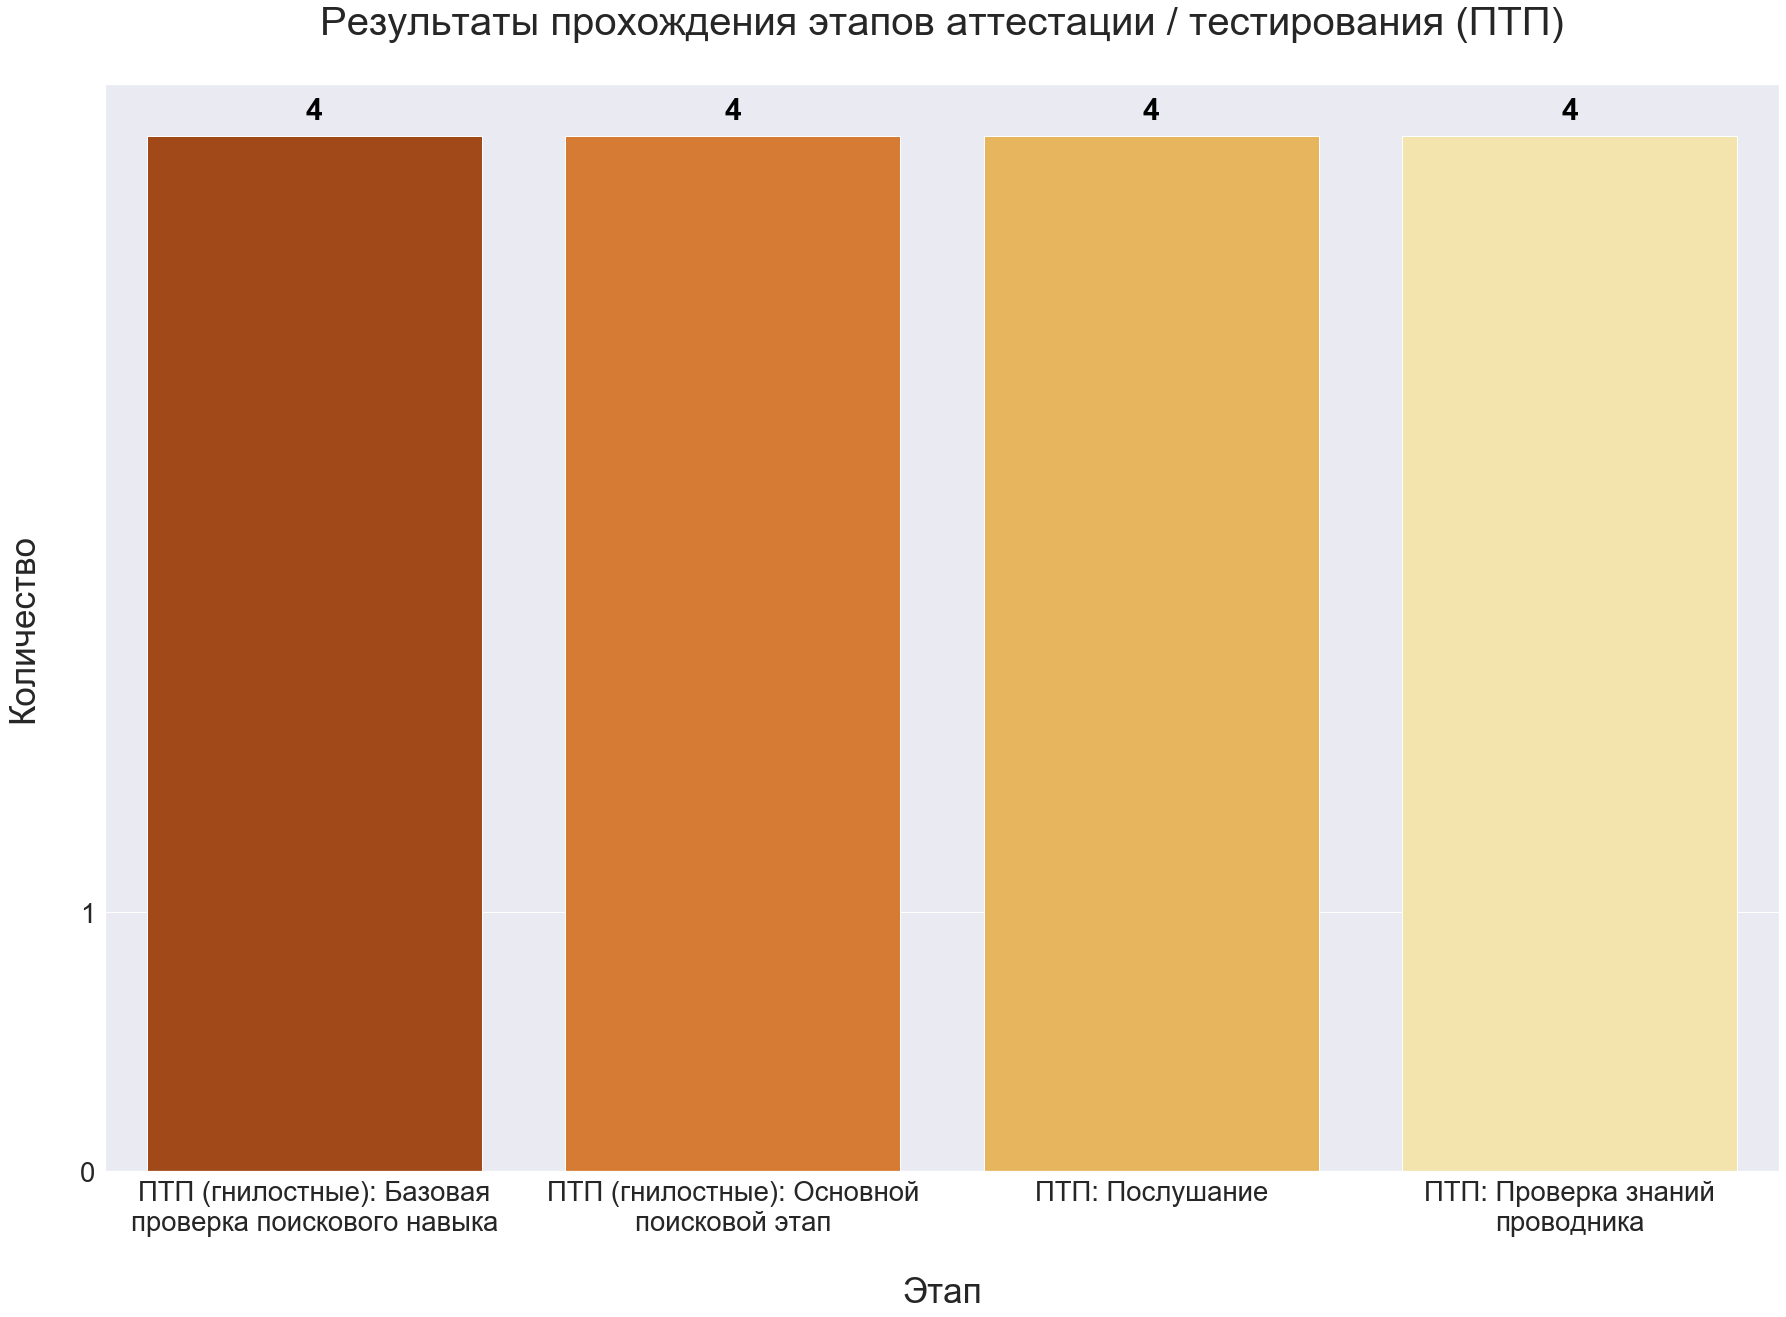

In [34]:
#размер области построения диаграммы
plt.figure(figsize=(30, 20)) 

#увеличиваем размер шрифта надписей на диаграмме
sns.set(font_scale = 2.5)  

#построение диаграммы
bars = sns.barplot(x ='Этап', y = 'Количество', palette = 'YlOrBr_r', data = df_pass_PTP_msc) 

ax = plt.gca()

#аннотирование столбцов диаграммы
autolabel(ax.patches, df_pass_PTP_msc['Количество'], height_factor=1.01) 

#название диаграммы
bars.axes.set_title('Результаты прохождения этапов аттестации / тестирования (ПТП)', fontsize=40, y = 1.04) 

bars.set_xlabel('Этап', fontsize=35, labelpad = 40) #название оси Х

bars.set_ylabel('Количество', fontsize=35, labelpad = 40) #название оси Y

plt.xticks(rotation=0) #поворот значений по оси Х

plt.yticks(range(0,2))

plt.show() #показываем диаграмму 

По специализации ПТП в 2023 г. в Московском регионе различные этапы аттестации проходили 4 КР. В результате каждый из 4 расчетов был аттестован и получил допуск до длительных автономных задач по специализации.



## <a id="title5">5. Время работы в зонах поиска при прохождении аттестации ПСС (класс А)</a>

In [35]:
#для работы с датой и временем воспользуемся соответствующей библиотекой

from datetime import datetime

In [36]:

#оборачиваем гугл-таблицу в датафрейм Пандас
df_time_A = get_as_dataframe(sh.worksheet('Here_is_sheet_name'), parse_dates=True) 

#выбираем необходимые для работы строки и столбцы по индексу
df_time_A = df_time_A.iloc[0:33, 0:3] 


In [37]:
#ДФ с временем работы в различных зонах в формате чч:мм

df_time_A_ = df_time_A.copy()

df_time_A_

,"время работы, зона 1","время работы, зона 2","время работы, общее"
0,0:58,1:05,2:18
1,1:15,1:28,2:59
2,1:56,1:40,3:44
3,2:34,1:10,3:52
4,1:50,1:42,3:42
5,1:37,1:45,3:39
6,1:18,1:41,3:12
7,2:04,1:37,4:00
8,1:45,2:08,4:00
9,1:29,0:59,2:51


In [38]:
df_time_A_.dtypes

время работы, зона 1    object
время работы, зона 2    object
время работы, общее     object
dtype: object

#### Общее время работы

In [39]:
df_time_hm_gen = df_time_A_['время работы, общее']

df_time_hm_gen.head()

0    2:18
1    2:59
2    3:44
3    3:52
4    3:42
Name: время работы, общее, dtype: object

In [40]:
#функция для перевода времени в колонке (чч:мм) в минуты

def hours_to_minutes(df_time_hm):
    
    df_time_A_hm = df_time_hm.str.split(':',expand=True)
    
    df_time_A_hm = df_time_A_hm.rename(columns = {0:'h', 1:'m'})

    df_time_A_hm = df_time_A_hm.astype(({'h':np.int64, 'm':np.int64,}))

    df_time_A_hm_list = df_time_A_hm['h'].to_list()
    
    df_time_A_hm_list_min = []

    for i in df_time_A_hm_list:
        df_time_A_hm_list_min.append(i*60)
        
    df_list = pd.DataFrame(df_time_A_hm_list_min).rename(columns = {0:'h_min'})

    df_gen_time = df_list['h_min'] + df_time_A_hm['m']

    df_gen_time = pd.DataFrame(df_gen_time).rename(columns = {0:'mins'})
    
    return df_gen_time


In [41]:
df_gen_time = hours_to_minutes(df_time_hm_gen)

df_gen_time.head()

,mins
0,138
1,179
2,224
3,232
4,222


In [42]:
df_gen_time_median = int(df_gen_time.median())

df_gen_time_mean = int(df_gen_time.mean())

print(f'Медиана: {df_gen_time_median} мин, Среднее: {df_gen_time_mean} мин')

Медиана: 206 мин, Среднее: 198 мин


In [43]:
print(f'Максимальное время: {df_gen_time.max()}, Минимальное время: {df_gen_time.min()}')


Максимальное время: mins    241
dtype: int64, Минимальное время: mins    108
dtype: int64


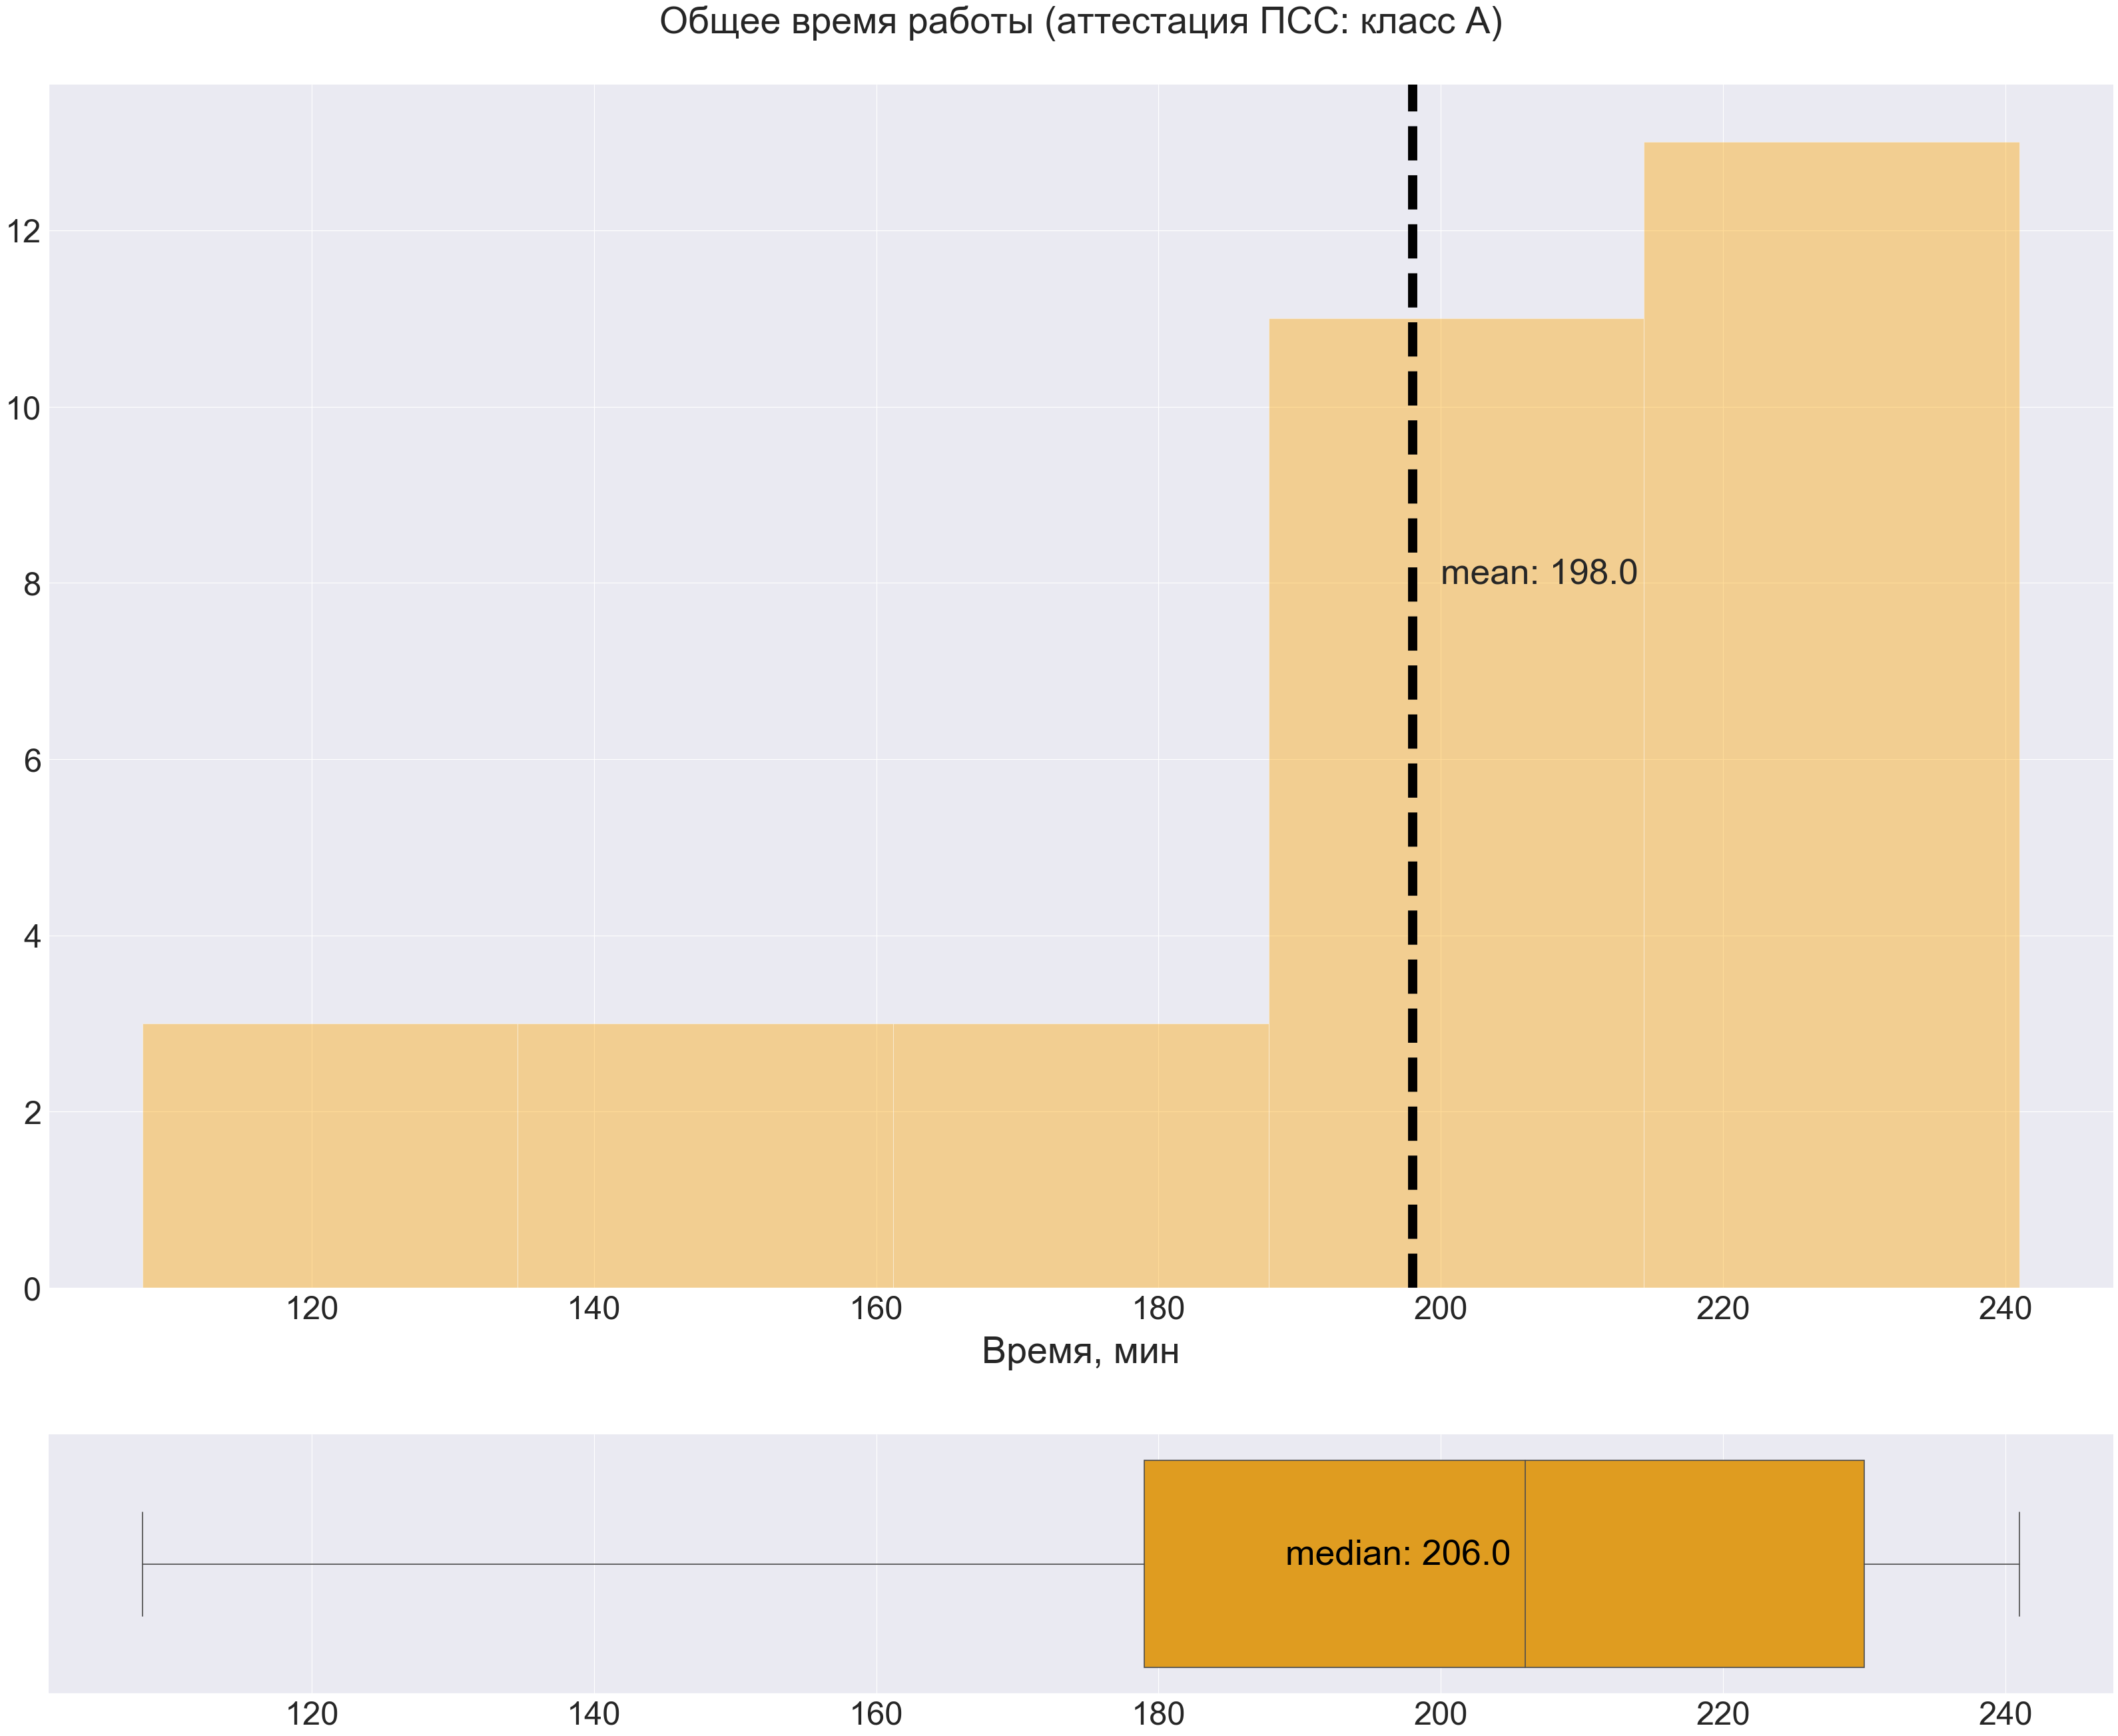

In [44]:
sns.set(font_scale = 4)  

fig, (ax_hist, ax_box) = plt.subplots(2, sharex=False, gridspec_kw={"height_ratios": (2.55, .55)}, figsize=(50, 40), dpi= 80)

#dist = sns.histplot(df_gen_time['mins'], ax=ax_hist, color='orange', kde=False)

dist = sns.distplot(df_gen_time['mins'], ax=ax_hist, color='orange', kde=False)

time_box = sns.boxplot(data = df_gen_time, x = 'mins', ax=ax_box, color='orange')

dist.axvline(df_gen_time_mean, c='black', ls='--', lw=12.5)

dist.text(200, 8, 'mean: {:.1f}'.format(df_gen_time_mean))

time_box.text(df_gen_time_median - 17, 0, 'median: {:.1f}'.format(df_gen_time_median), color='black')


dist.axes.set_title('Общее время работы (аттестация ПСС: класс А)', fontsize=50, y = 1.04)
dist.set_xlabel('Время, мин', fontsize=50, labelpad = 15)
ax_box.set(xlabel='')
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_box.set_yticks([])
plt.show()

Общее время работы КР в двух зонах поиска лежит в диапазоне от 108 до 241 мин. Среднее время работы 198 мин (медиана - 206 мин).

#### Время работы в зоне 1

In [45]:
df_time_hm_1 = df_time_A_['время работы, зона 1']

df_time_hm_1.head()

0    0:58
1    1:15
2    1:56
3    2:34
4    1:50
Name: время работы, зона 1, dtype: object

In [46]:
df_gen_time_1 = hours_to_minutes(df_time_hm_1)

df_gen_time_1.head()

,mins
0,58
1,75
2,116
3,154
4,110


In [47]:
df_gen_time_1_median = int(df_gen_time_1.median())

df_gen_time_1_mean = int(df_gen_time_1.mean())

print(f'Медиана: {df_gen_time_1_median} мин, Среднее: {df_gen_time_1_mean} мин')

Медиана: 93 мин, Среднее: 92 мин


In [48]:
print(f'Максимальное время: {df_gen_time_1.max()}, Минимальное время: {df_gen_time_1.min()}')

Максимальное время: mins    154
dtype: int64, Минимальное время: mins    58
dtype: int64


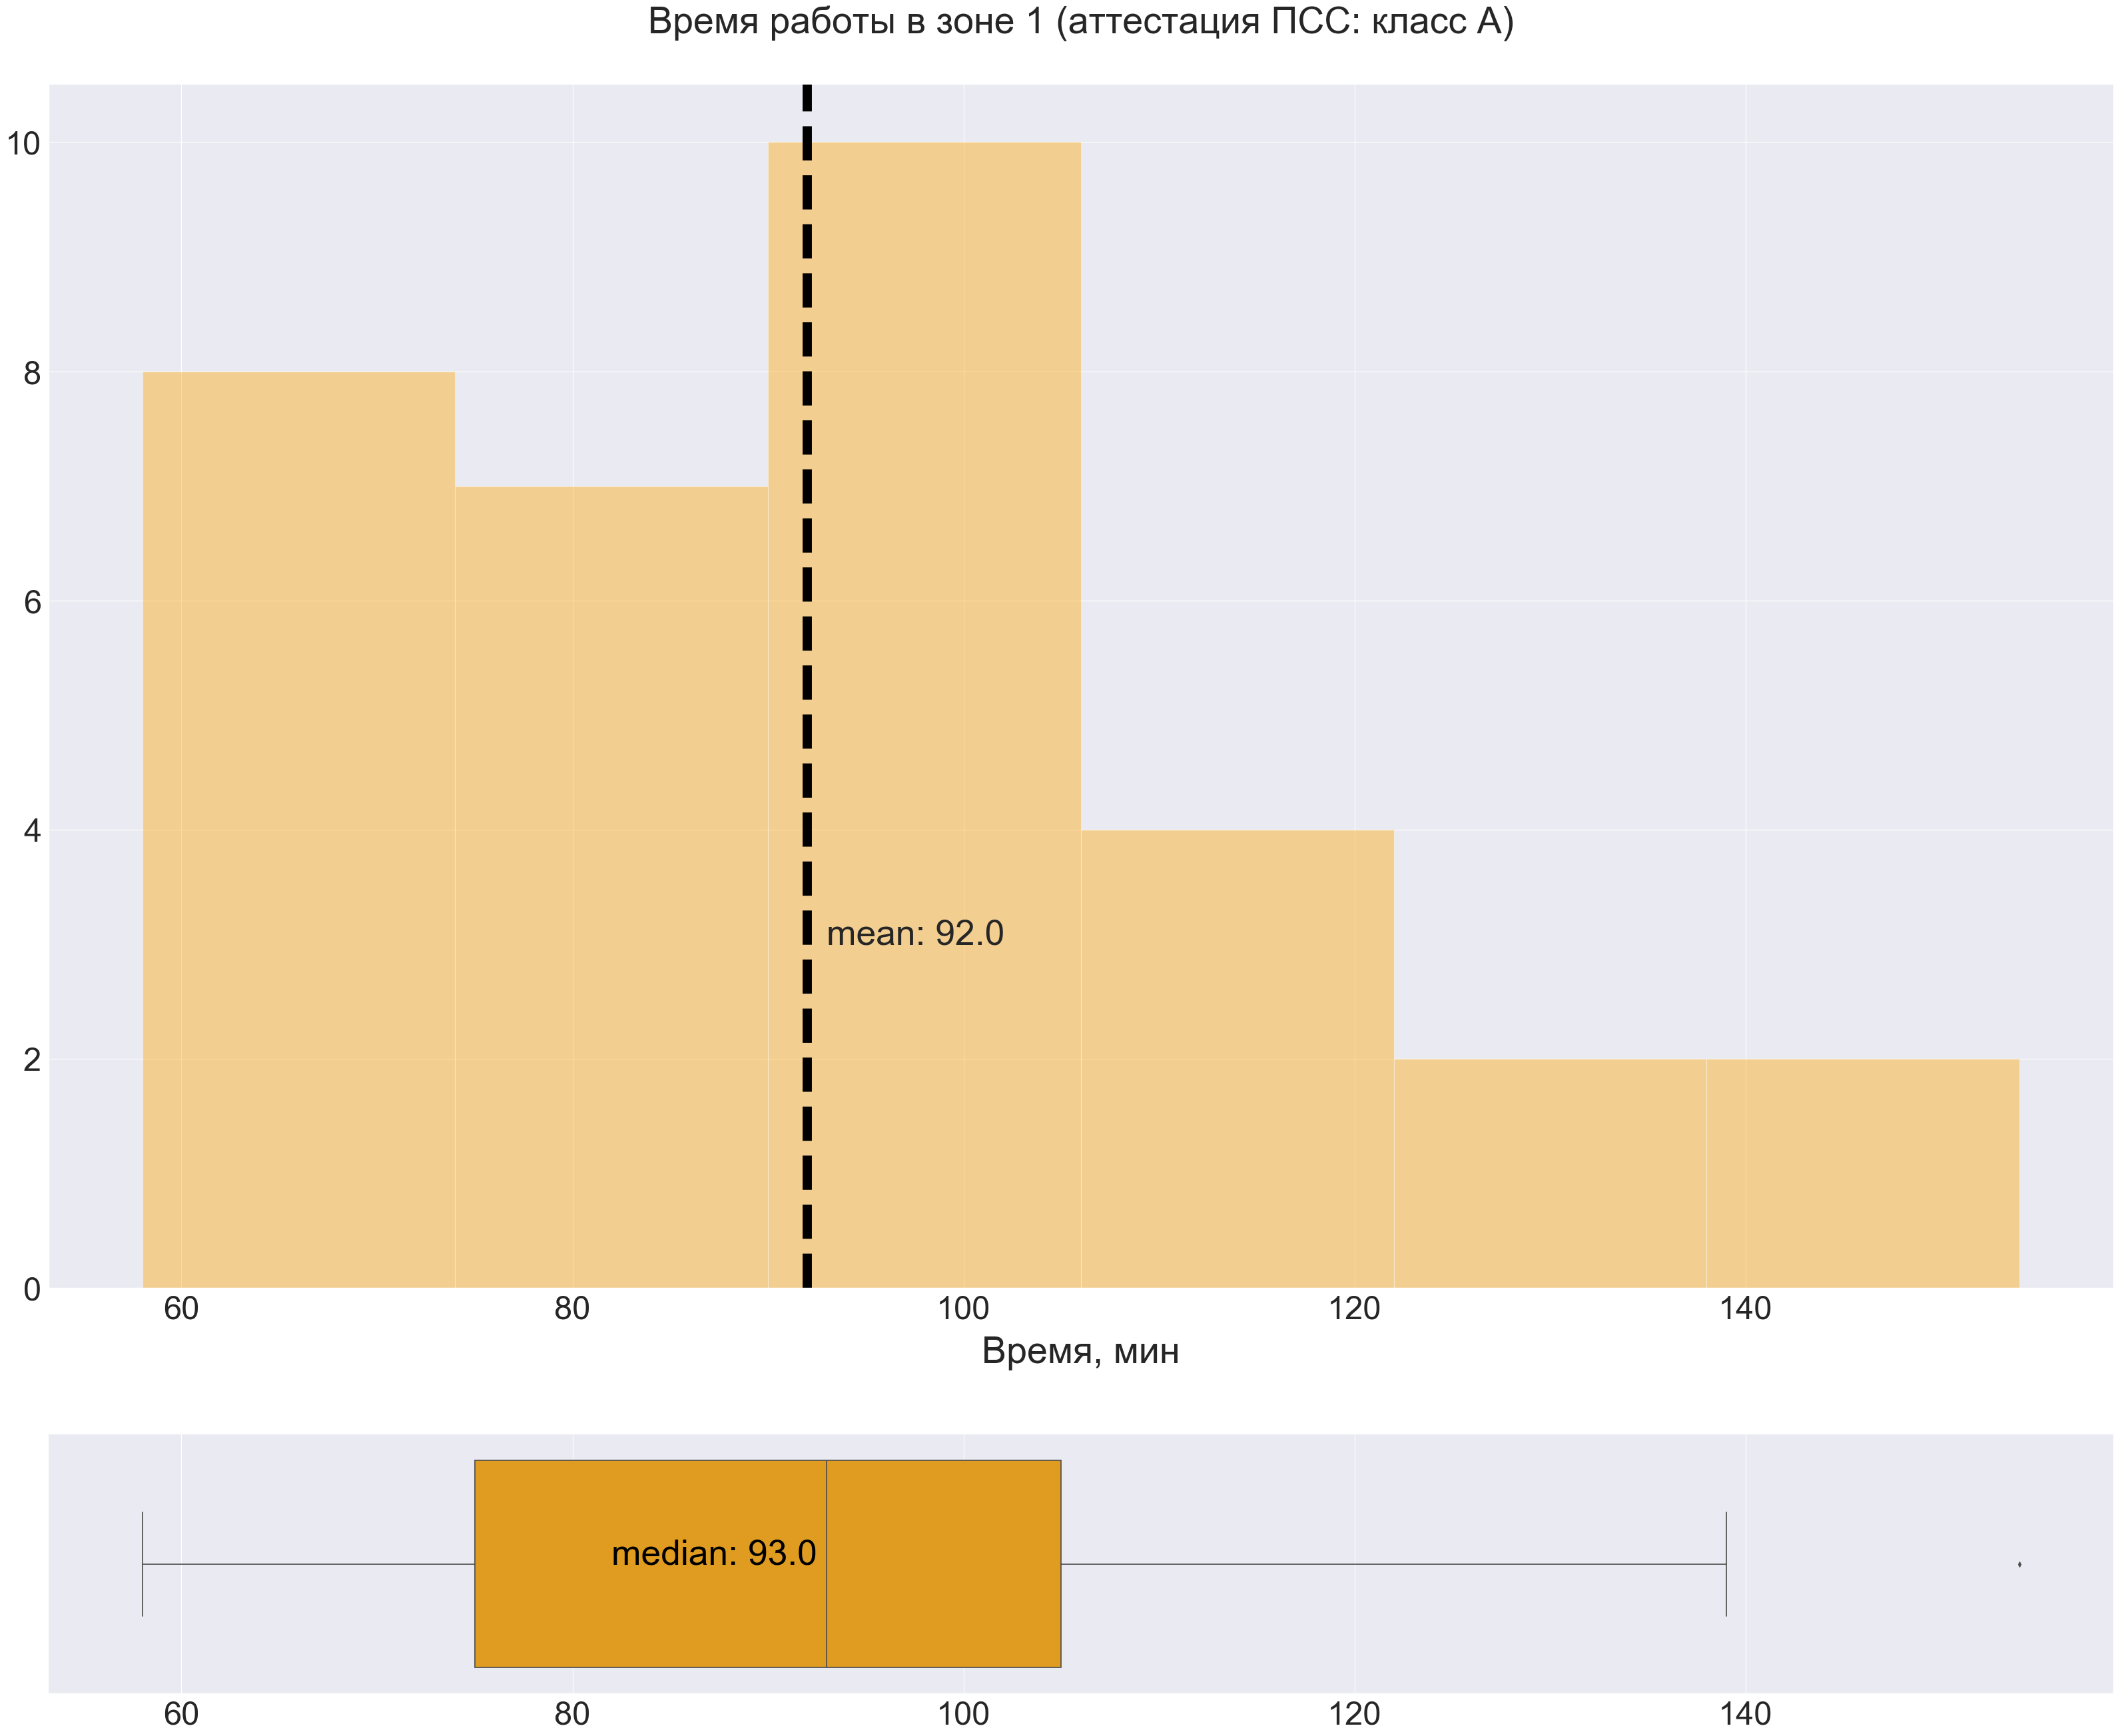

In [49]:
sns.set(font_scale = 4)  

fig, (ax_hist, ax_box) = plt.subplots(2, sharex=False, gridspec_kw={"height_ratios": (2.55, .55)}, figsize=(50, 40), dpi= 80)

#dist = sns.histplot(df_gen_time_1['mins'], ax=ax_hist, color='orange', kde=False)

dist = sns.distplot(df_gen_time_1['mins'], ax=ax_hist, color='orange', kde=False)

time_box = sns.boxplot(data = df_gen_time_1, x = 'mins', ax=ax_box, color='orange')

dist.axvline(df_gen_time_1_mean, c='black', ls='--', lw=12.5)

dist.text(93, 3, 'mean: {:.1f}'.format(df_gen_time_1_mean))

time_box.text(df_gen_time_1_median - 11, 0, 'median: {:.1f}'.format(df_gen_time_1_median), color='black')

dist.axes.set_title('Время работы в зоне 1 (аттестация ПСС: класс А)', fontsize=50, y = 1.04)
dist.set_xlabel('Время, мин', fontsize=50, labelpad = 15)
ax_box.set(xlabel='')
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_box.set_yticks([])
plt.show()

Общее время работы КР в Зоне 1 лежит в диапазоне от 58 до 154 мин. Среднее время работы 92 мин (медиана - 93 мин).

#### Время работы в зоне 2

In [50]:
df_time_hm_2 = df_time_A_['время работы, зона 2']

df_time_hm_2.head()

0    1:05
1    1:28
2    1:40
3    1:10
4    1:42
Name: время работы, зона 2, dtype: object

In [51]:
df_gen_time_2 = hours_to_minutes(df_time_hm_2)

df_gen_time_2.head()

,mins
0,65
1,88
2,100
3,70
4,102


In [52]:
df_gen_time_2_median = int(df_gen_time_2.median())

df_gen_time_2_mean = int(df_gen_time_2.mean())

print(f'Медиана: {df_gen_time_2_median} мин, Среднее: {df_gen_time_2_mean} мин')

Медиана: 100 мин, Среднее: 90 мин


In [53]:
print(f'Максимальное время: {df_gen_time_2.max()}, Минимальное время: {df_gen_time_2.min()}')

Максимальное время: mins    131
dtype: int64, Минимальное время: mins    23
dtype: int64


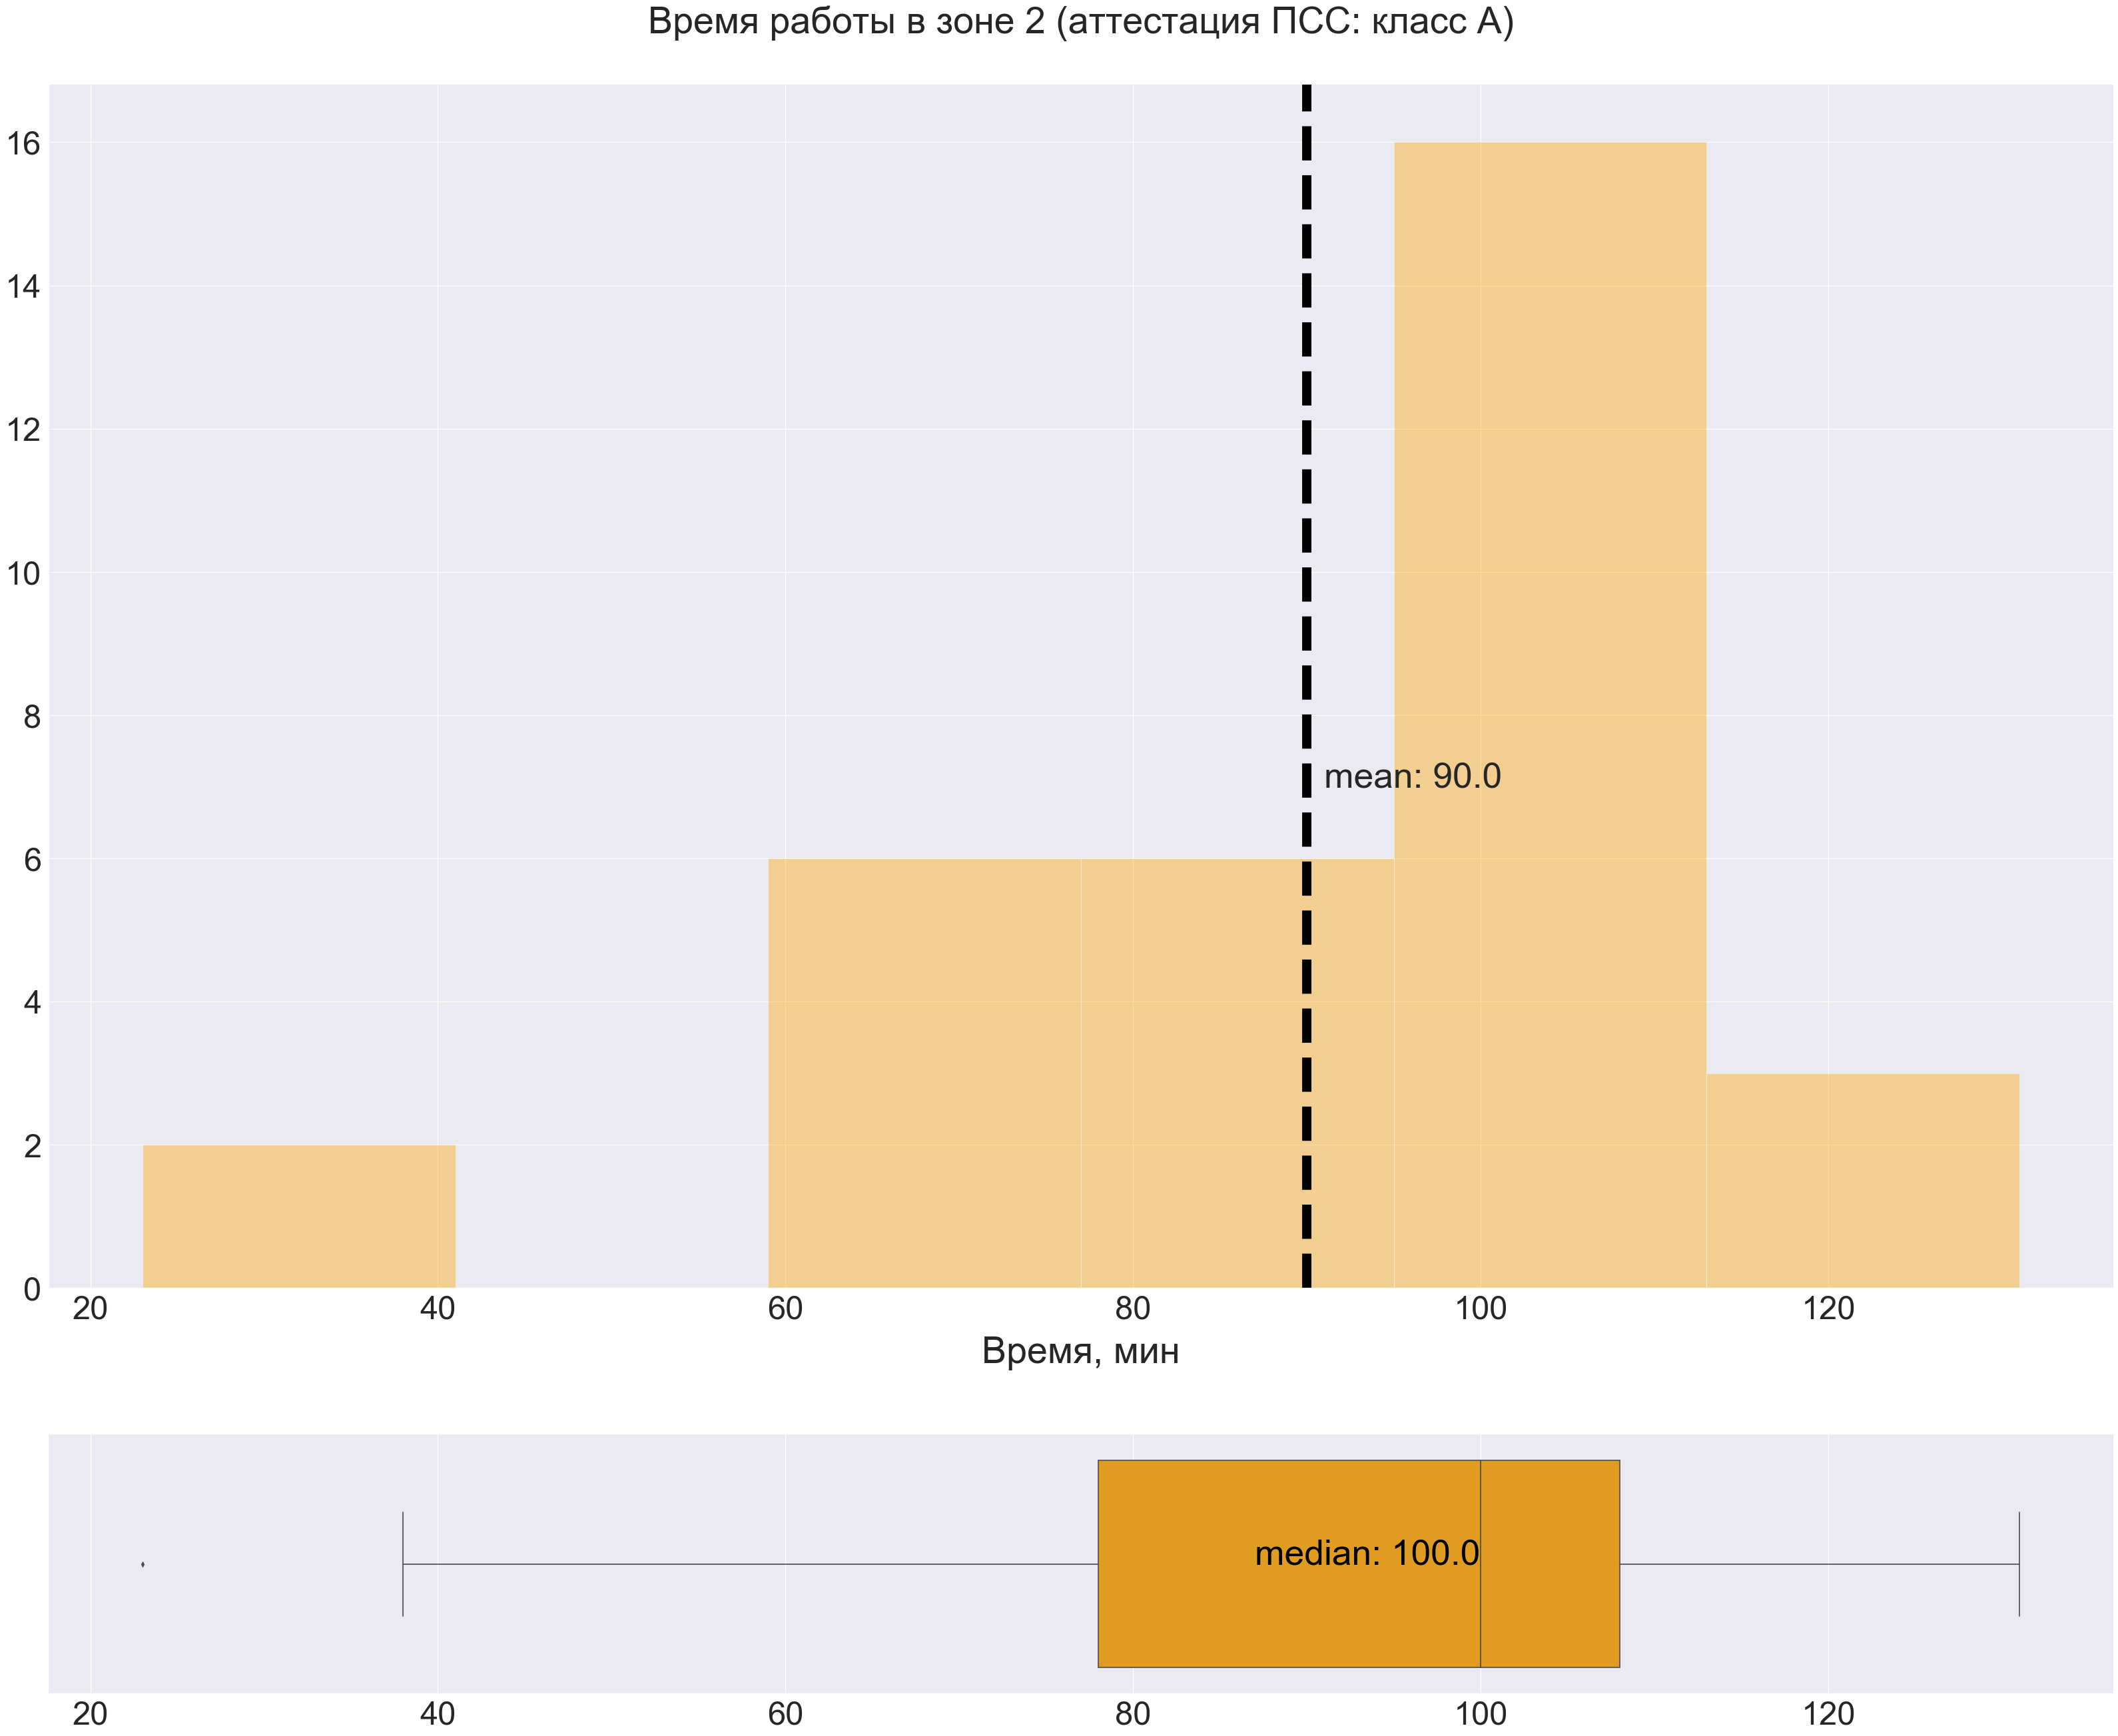

In [54]:
sns.set(font_scale = 4)  

fig, (ax_hist, ax_box) = plt.subplots(2, sharex=False, gridspec_kw={"height_ratios": (2.55, .55)}, figsize=(50, 40), dpi= 80)

#dist = sns.histplot(df_gen_time_2['mins'], ax=ax_hist, color='orange', kde=False)

dist = sns.distplot(df_gen_time_2['mins'], ax=ax_hist, color='orange', kde=False)

time_box = sns.boxplot(data = df_gen_time_2, x = 'mins', ax=ax_box, color='orange')

dist.axvline(df_gen_time_2_mean, c='black', ls='--', lw=12.5)

dist.text(91, 7, 'mean: {:.1f}'.format(df_gen_time_2_mean))

time_box.text(df_gen_time_2_median - 13, 0, 'median: {:.1f}'.format(df_gen_time_2_median), color='black')

dist.axes.set_title('Время работы в зоне 2 (аттестация ПСС: класс А)', fontsize=50, y = 1.04)
dist.set_xlabel('Время, мин', fontsize=50, labelpad = 15)
ax_box.set(xlabel='')
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_box.set_yticks([])
plt.show()

Общее время работы КР в Зоне 2 лежит в диапазоне от 23 до 131 мин. Среднее время работы 90 мин (медиана - 100 мин).